#### Context to be learned
     1. Import Data and Data description
     2. Data type Conversion
     3. Dealing with duplicates and dropping columns
     4. Slicing or Indexing in DataFrame
     5. Missing value Imputation
     6. Outlier Detection
     7. Scatter plot and correlation
     8. Transformation
     9. Scaling

# EDA(Exploratary Data Analysis)
  * Exploratary Data Analysis(EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover
    trends, patterns, or to check assumptions with the help of statistical summary and grapgical representations.

  * Steps Invovled in EDA:
     1. Describing the Data.
     2. Data Cleaning.
     3. Imputation techniques.
     4. Data analysis and Visualization.
     5. Trasnformation. 

------------------------------------------------------------------------------------------------------------------------------------------------------

# Import Data and Data Description

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline 
#it will help to print the charts directly.1

In [187]:
import warnings
warnings.filterwarnings('ignore')

In [188]:
#import the required dataset as i have used the CSV file.
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Machine-Learning/main/EDA-1/data_clean.csv', index_col = 0)
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


----------------------------------------------------------------------------------------------------------------------------------------------------

1. Normal Distribution ==> Mean = Meadian
2. +ve Skewness        ==> Mean > Median
3. -ve Skewness        ==> Mean < Meadian

In [189]:
#describing the dataset, by default describe function will give the descriptove statistics for all numerical columns(discrete & continour)
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [190]:
df.describe(include = object)

,Month,Weather
count,158,155
unique,6,3
top,9,S
freq,34,59


In [191]:
df['Month'].value_counts()

Month
9      34
5      31
7      31
8      31
6      30
May     1
Name: count, dtype: int64

In [192]:
df['Weather'].value_counts()

Weather
S     59
C     49
PS    47
Name: count, dtype: int64

In [193]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

##### df.info

# Data type Conversion

In [194]:
df['Month']

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: object

In [195]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [196]:
df['Month'].replace('May','5', inplace=True)

In [197]:
df['Month'] = df['Month'].astype(int)

In [198]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S


----------------------------------------------------------------------------------------------------------------------------------------------------------

# Duplicates

In [199]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [200]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [201]:
df.duplicated().sum()

1

In [202]:
0 == False

True

In [203]:
1 == True

True

In [204]:
df.shape

(158, 8)

In [205]:
#drop duplicate records
df.drop_duplicates(inplace = True)

In [206]:
df.shape

(157, 8)

In [207]:
df.duplicated().sum()

0

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# Drop Column
  * There is one column which has only single different value
  * we need to get rid of all the uneccesary columns or else it will be vary complex data.

In [208]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S


In [209]:
df['Year'].var()

0.0

In [210]:
df.drop(columns = ['Year'], inplace = True)

In [211]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S


-----------------------------------------------------------------------------------------------------------------------------------------------------------

# Rename the Columns

In [212]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


In [213]:
df.rename(columns = {'Solar.R':'Solar','Temp':'Temprature'}, inplace = True)

In [214]:
df

,Ozone,Solar,Wind,Month,Day,Temprature,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


-----------------------------------------------------------------------------------------------------------------------------------------------------------

# Slicing OR Indexing in Dataframe
  *

In [215]:
#iloc Function use to retrive data of from row 5 to 25 from first 3 column
df.iloc[5:26,0:3]

,Ozone,Solar,Wind
6,28.0,NaN,14.9
7,23.0,299.0,8.6
8,19.0,99.0,13.8
9,8.0,19.0,20.1
10,NaN,194.0,8.6
11,7.0,NaN,6.9
12,16.0,256.0,9.7
13,11.0,290.0,9.2
14,14.0,274.0,10.9
15,18.0,65.0,13.2


In [216]:
df.loc[5:26,'Ozone':'Wind']

,Ozone,Solar,Wind
5,NaN,NaN,14.3
6,28.0,NaN,14.9
7,23.0,299.0,8.6
8,19.0,99.0,13.8
9,8.0,19.0,20.1
10,NaN,194.0,8.6
11,7.0,NaN,6.9
12,16.0,256.0,9.7
13,11.0,290.0,9.2
14,14.0,274.0,10.9


-----------------------------------------------------------------------------------------------------------------------------------------------------------

# Missing value imputation
  * In dataset, missing data or missing values occurs when no data values is stored for the variable in an observation.
  * Missing data are a common occurence and can have a significant effect on the conclusions that can be drawn from the data.
  * if we don't impute or handle null values, we will not be able to create a machine learning models as python doesn't understand
    missing values.
  * Handling missing values is a crucial step in EDA.
  * Missing values can appear for several reasons like:
       1. Incomplete data entry.
       2. Issues with machines
       3. Imporper handling of data
       4. and many more

In [217]:
df

,Ozone,Solar,Wind,Month,Day,Temprature,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


In [218]:
#checking null values
df.isna()

,Ozone,Solar,Wind,Month,Day,Temprature,Weather
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False


In [219]:
df.isnull()

,Ozone,Solar,Wind,Month,Day,Temprature,Weather
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False


In [220]:
df.isnull().sum()

Ozone         38
Solar          7
Wind           0
Month          0
Day            0
Temprature     0
Weather        3
dtype: int64

In [221]:
#For loop to calculate the % of the missing values in each coloumn
for i in df.isna().sum():
    print((i/len(df))*100,'%')

24.203821656050955 %
4.45859872611465 %
0.0 %
0.0 %
0.0 %
0.0 %
1.910828025477707 %


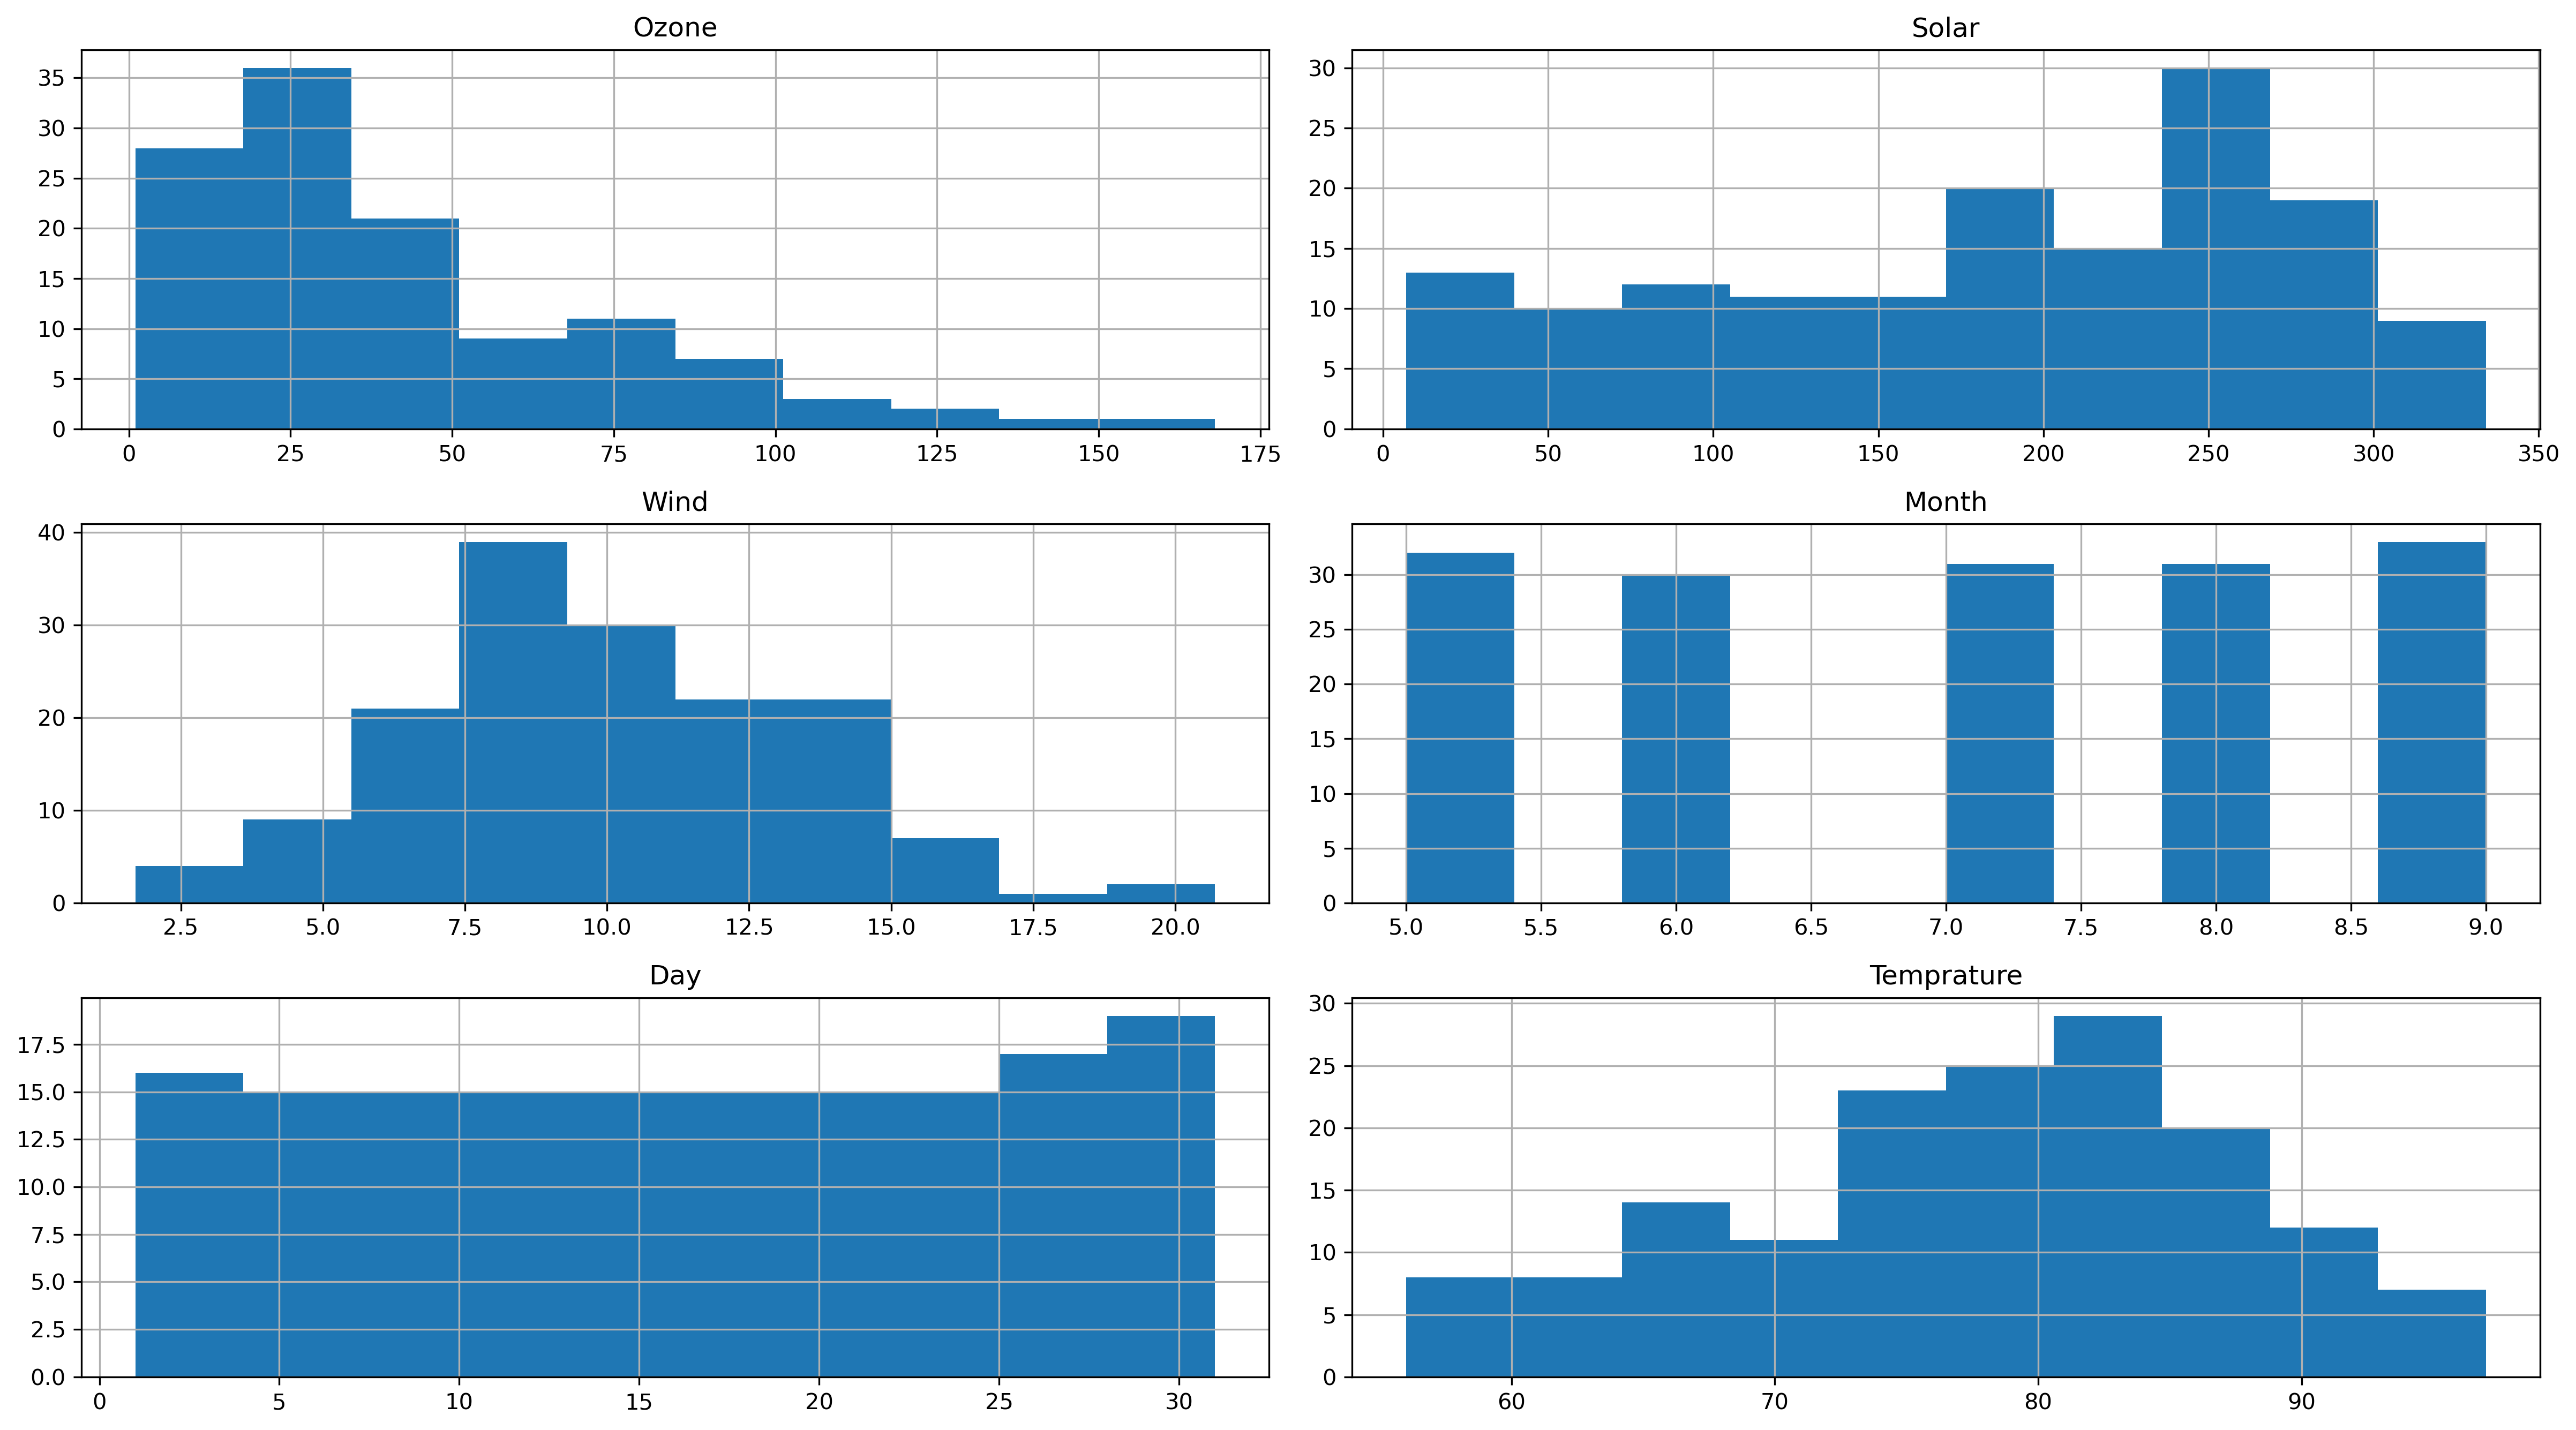

In [222]:
df.hist()
plt.tight_layout()

<Axes: >

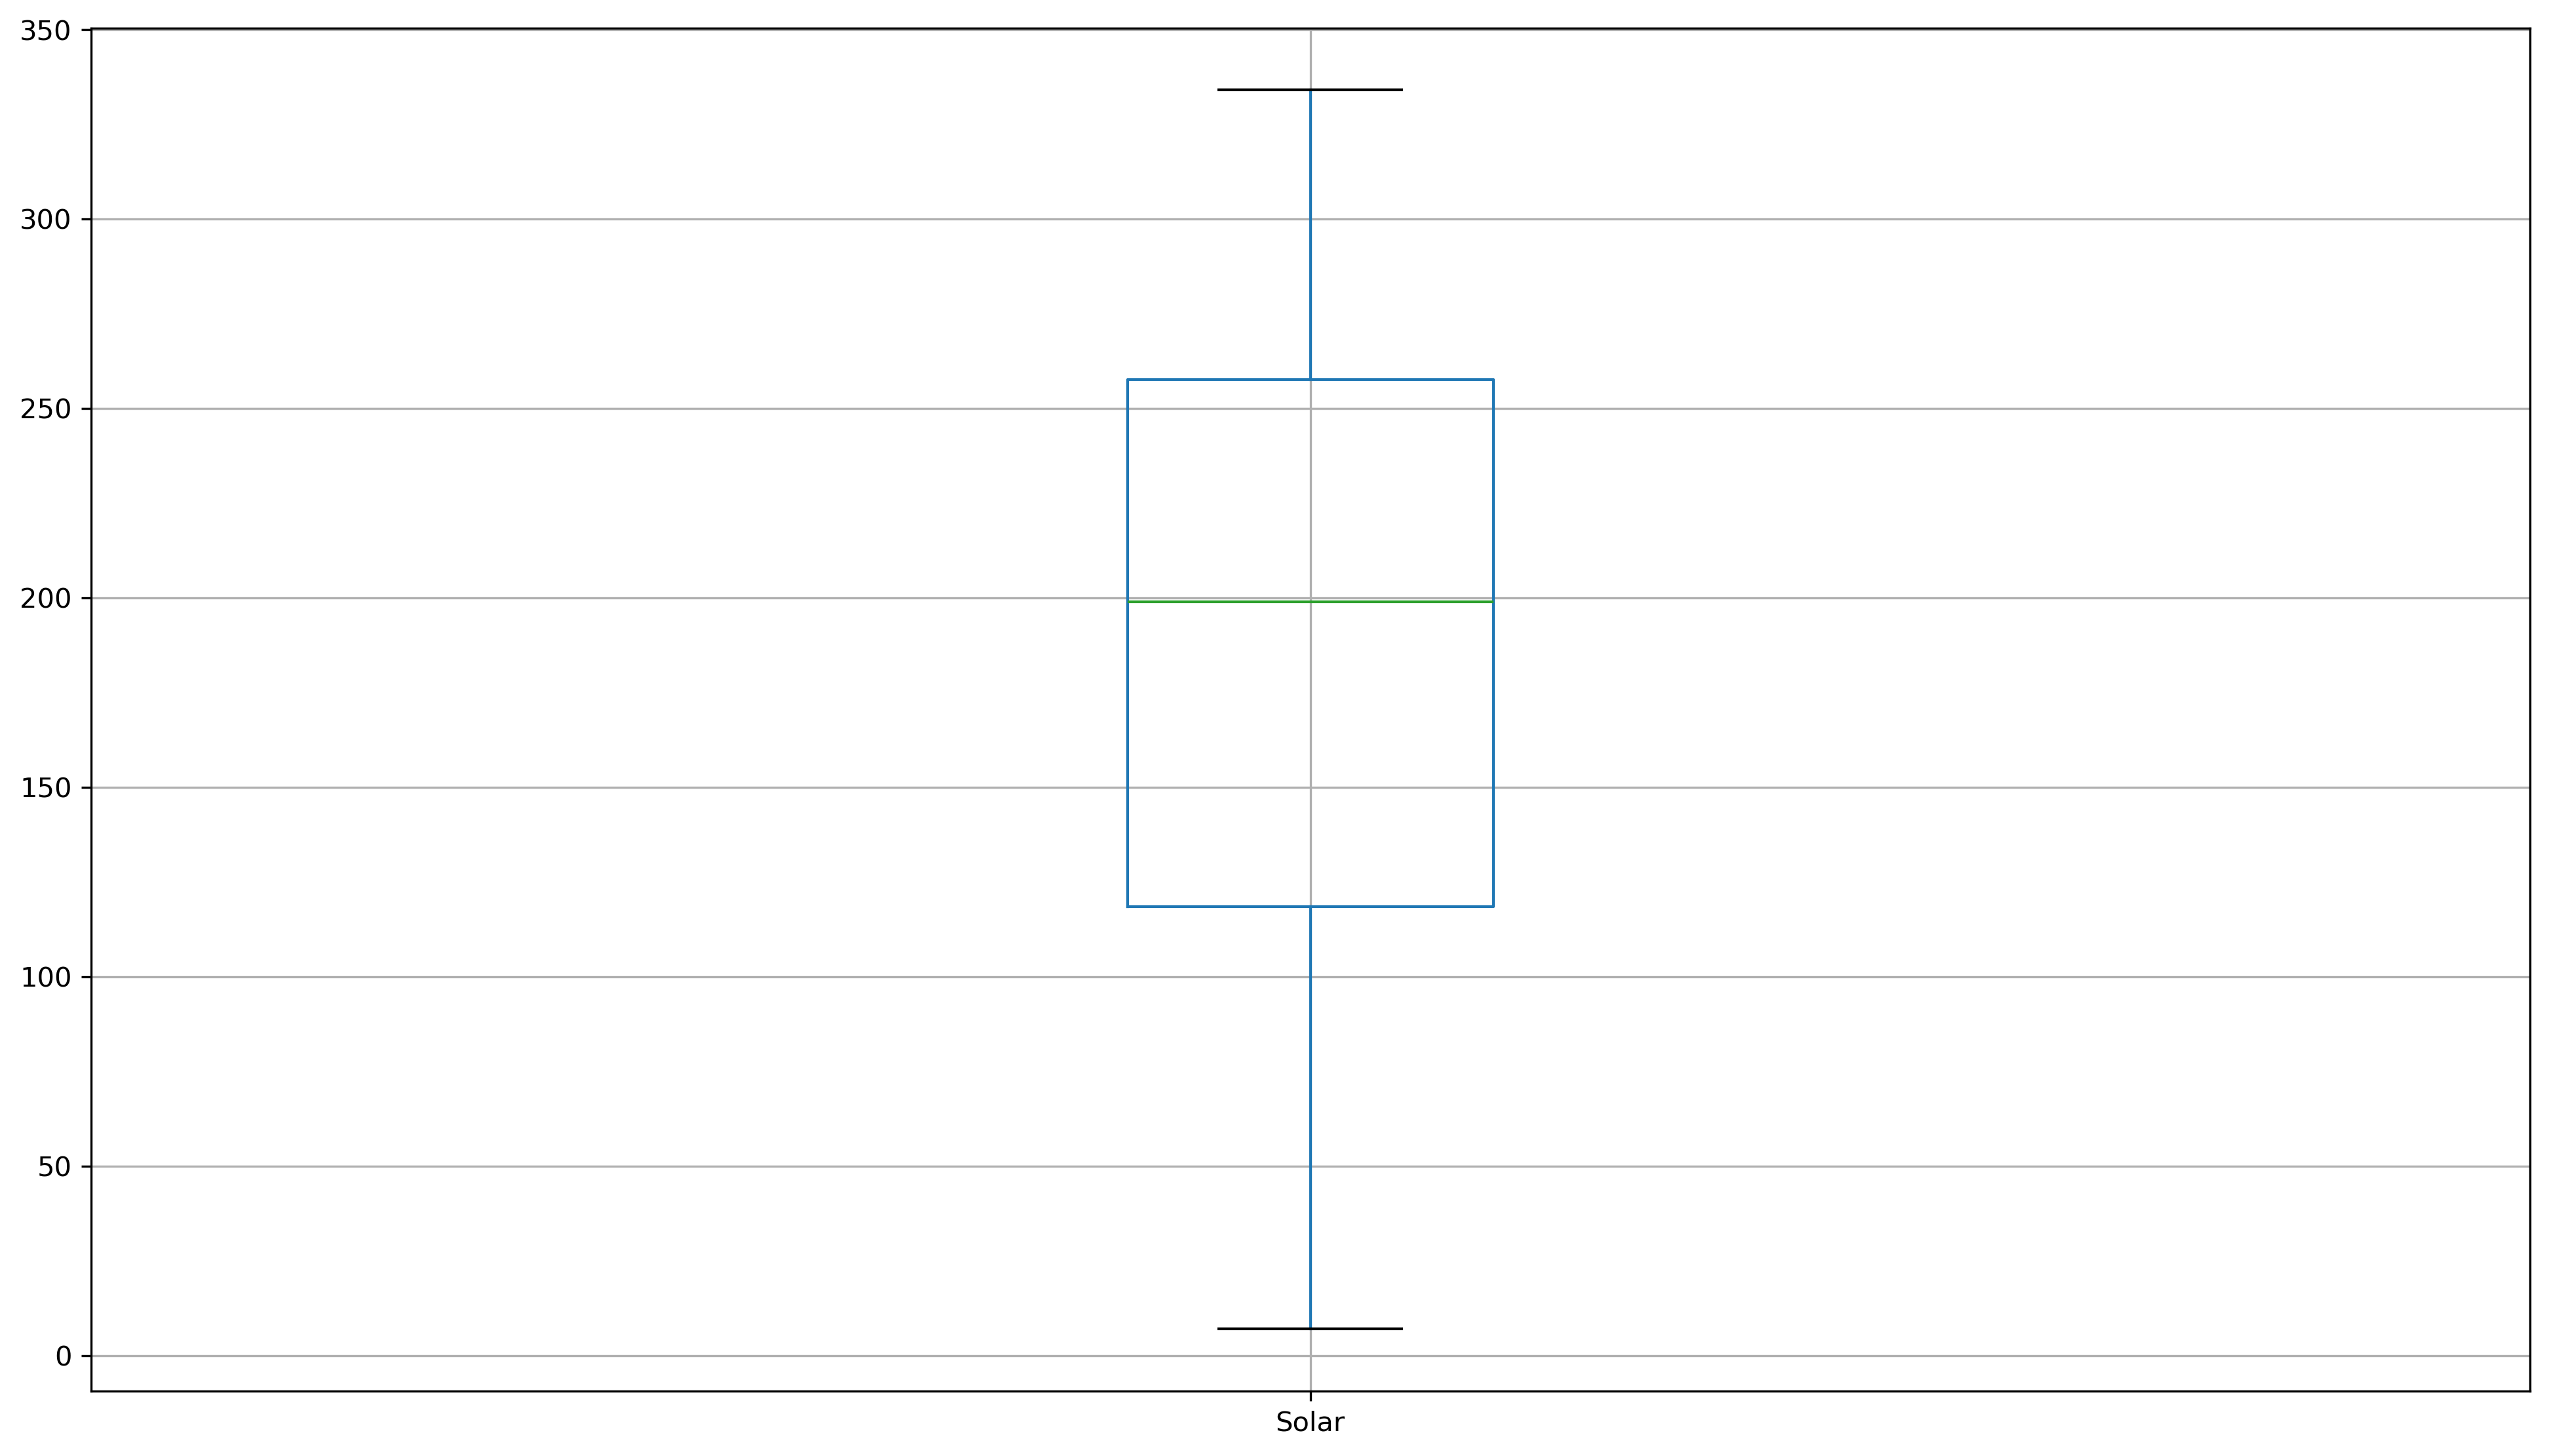

In [223]:
df.boxplot(column = 'Solar')

In [224]:
ozone_median = df['Ozone'].median()
ozone_median

31.0

In [225]:
df['Ozone'].fillna(ozone_median, inplace = True)

In [226]:
df.isna().sum()

Ozone         0
Solar         7
Wind          0
Month         0
Day           0
Temprature    0
Weather       3
dtype: int64

In [227]:
df['Solar'].mean()

185.36666666666667

In [228]:
df['Solar'].fillna(df['Solar'].mean(), inplace = True)

In [229]:
df['Weather'].value_counts()

Weather
S     58
C     49
PS    47
Name: count, dtype: int64

In [230]:
df['Weather'].mode()

0    S
Name: Weather, dtype: object

In [231]:
df['Weather'].mode()[0]

'S'

In [232]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace = True)

In [233]:
df.isna().sum()

Ozone         0
Solar         0
Wind          0
Month         0
Day           0
Temprature    0
Weather       0
dtype: int64

In [234]:
df.isna().sum()

Ozone         0
Solar         0
Wind          0
Month         0
Day           0
Temprature    0
Weather       0
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------------------------------------

array([[<Axes: title={'center': 'Ozone'}>,
        <Axes: title={'center': 'Solar'}>],
       [<Axes: title={'center': 'Wind'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Temprature'}>]], dtype=object)

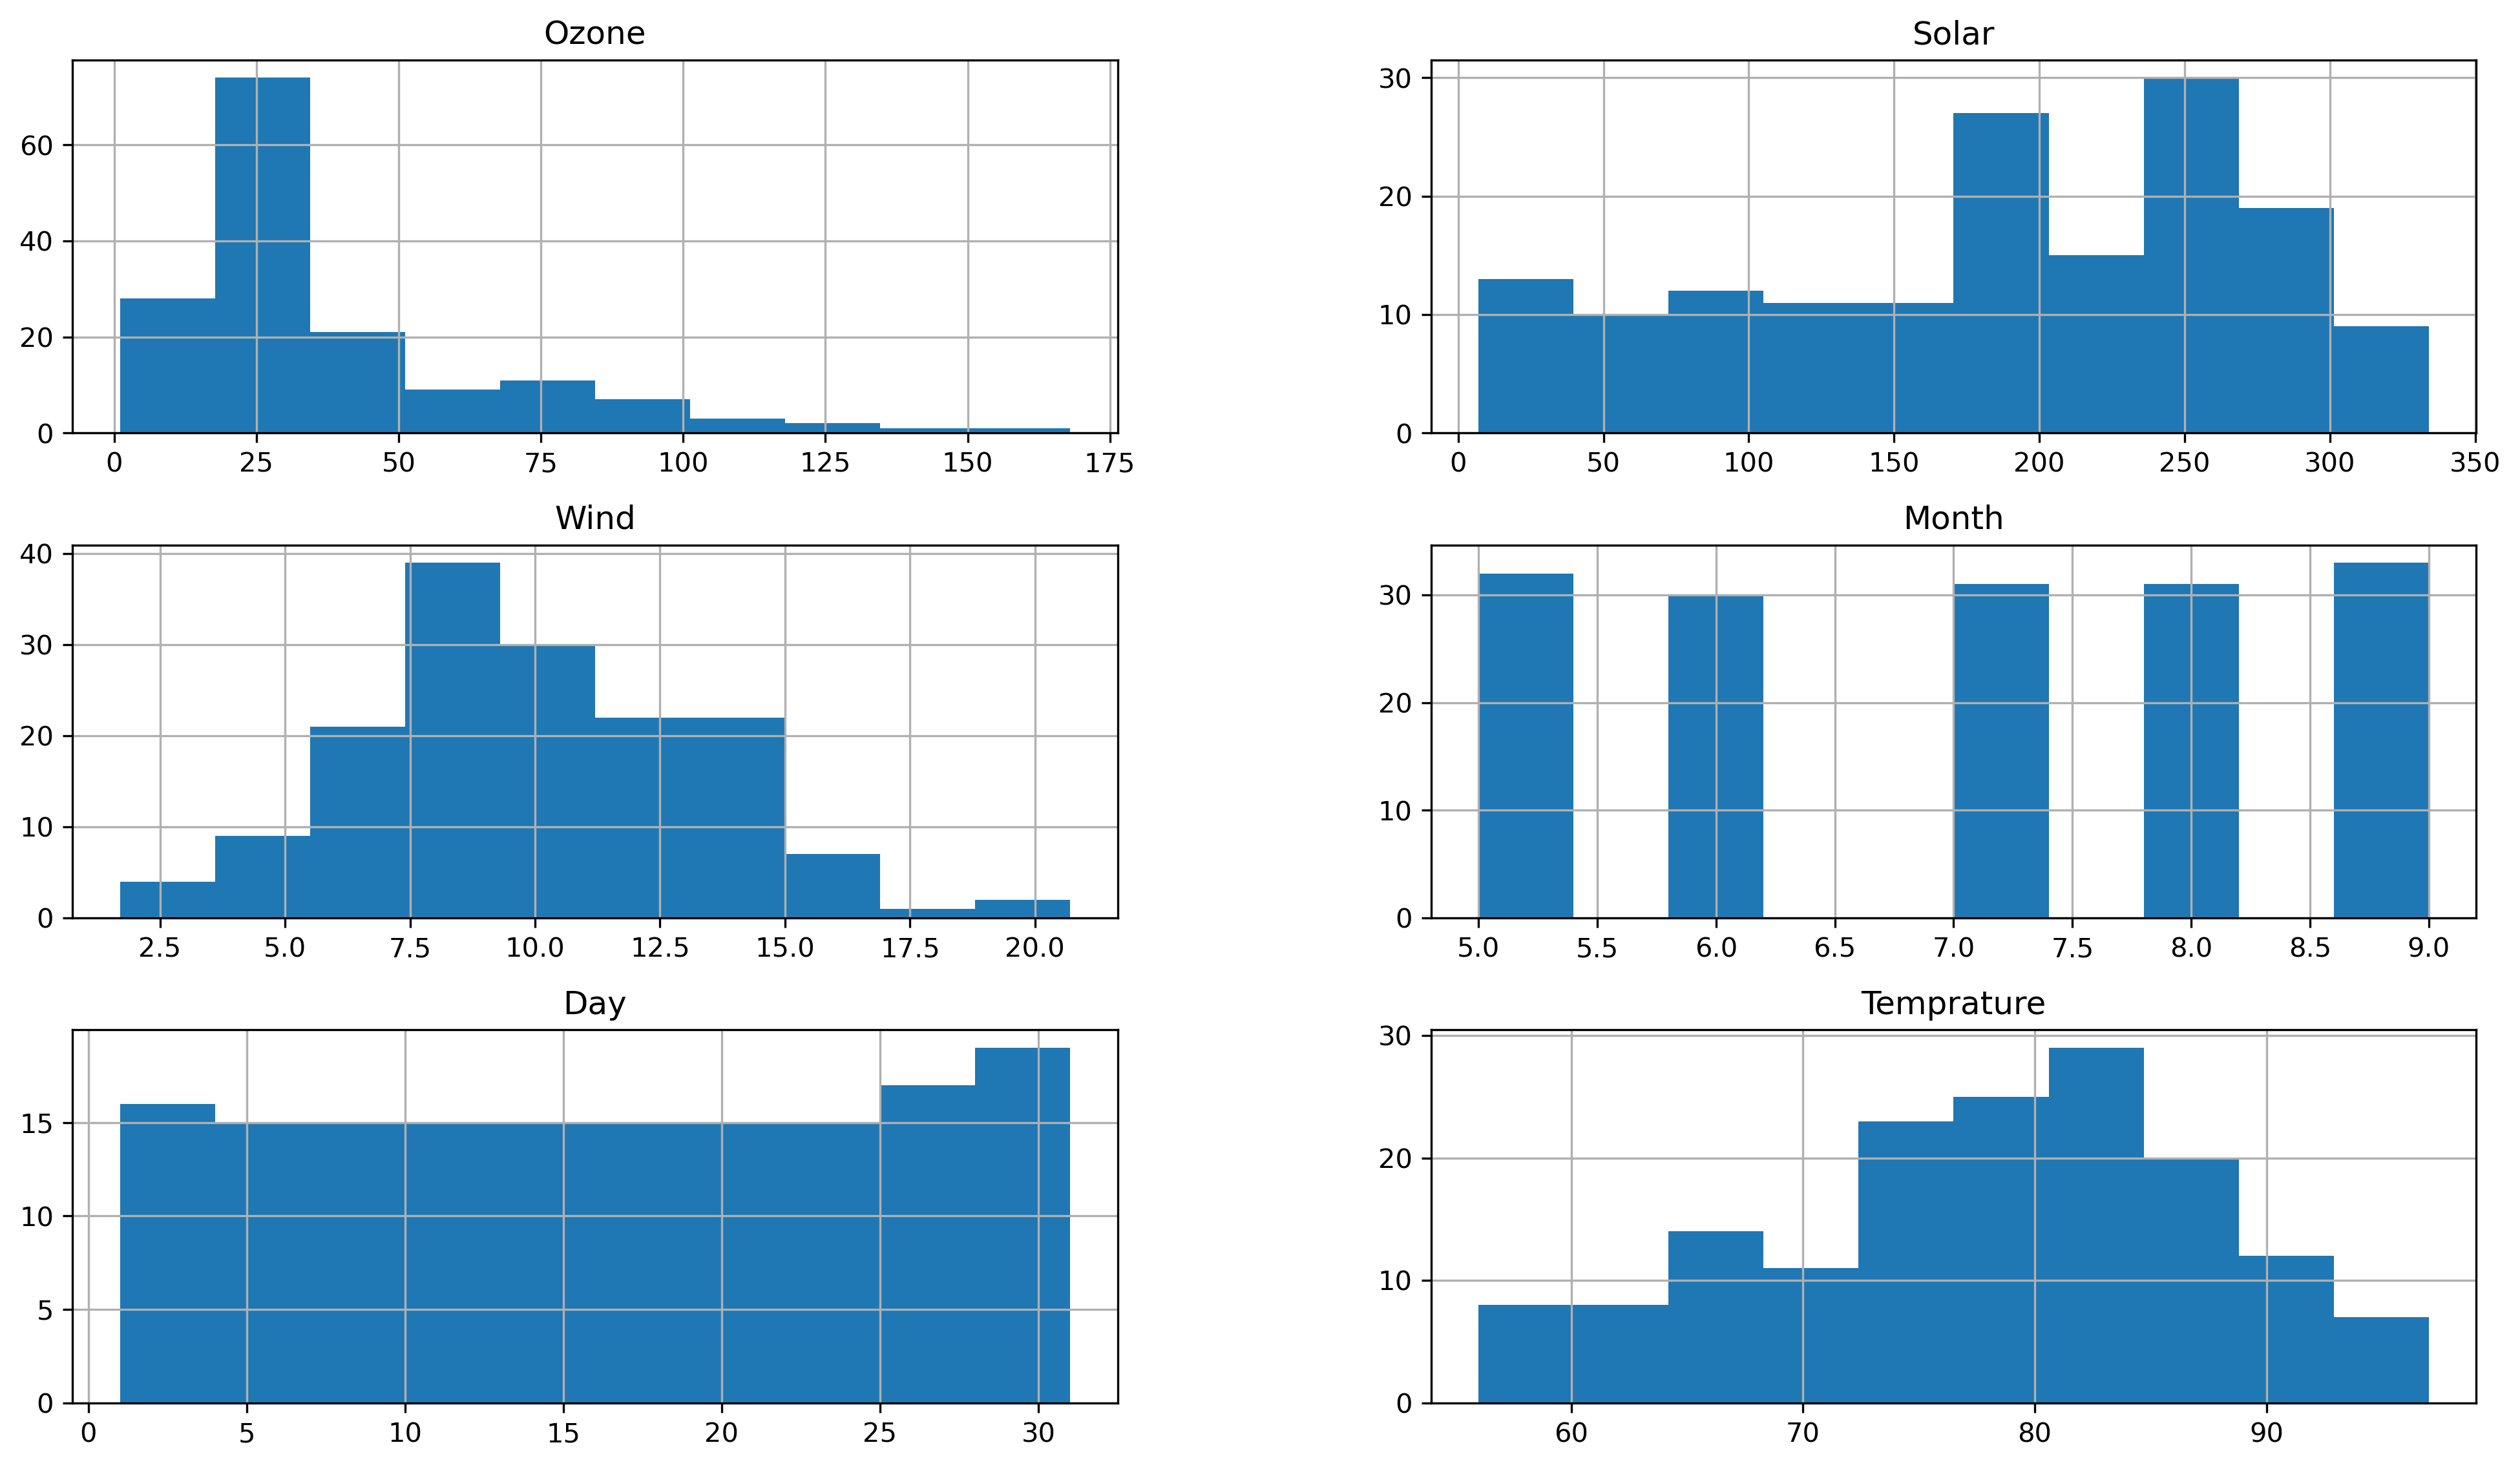

In [235]:
df.hist()

# Outlier Detection
    * There are multiple approaches to detect outliers in the dataset.
      1. Histogram
      2. Boxplot
      3. Descriptive stats for df

In [236]:
df.describe()

,Ozone,Solar,Wind,Month,Day,Temprature
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,39.197452,185.366667,9.929936,7.019108,15.929936,77.745223
std,28.781992,86.998999,3.505188,1.434338,8.974404,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,56.000000
25%,21.000000,127.000000,7.400000,6.000000,8.000000,72.000000
50%,31.000000,193.000000,9.700000,7.000000,16.000000,79.000000
75%,45.000000,255.000000,11.500000,8.000000,24.000000,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,97.000000


<Axes: >

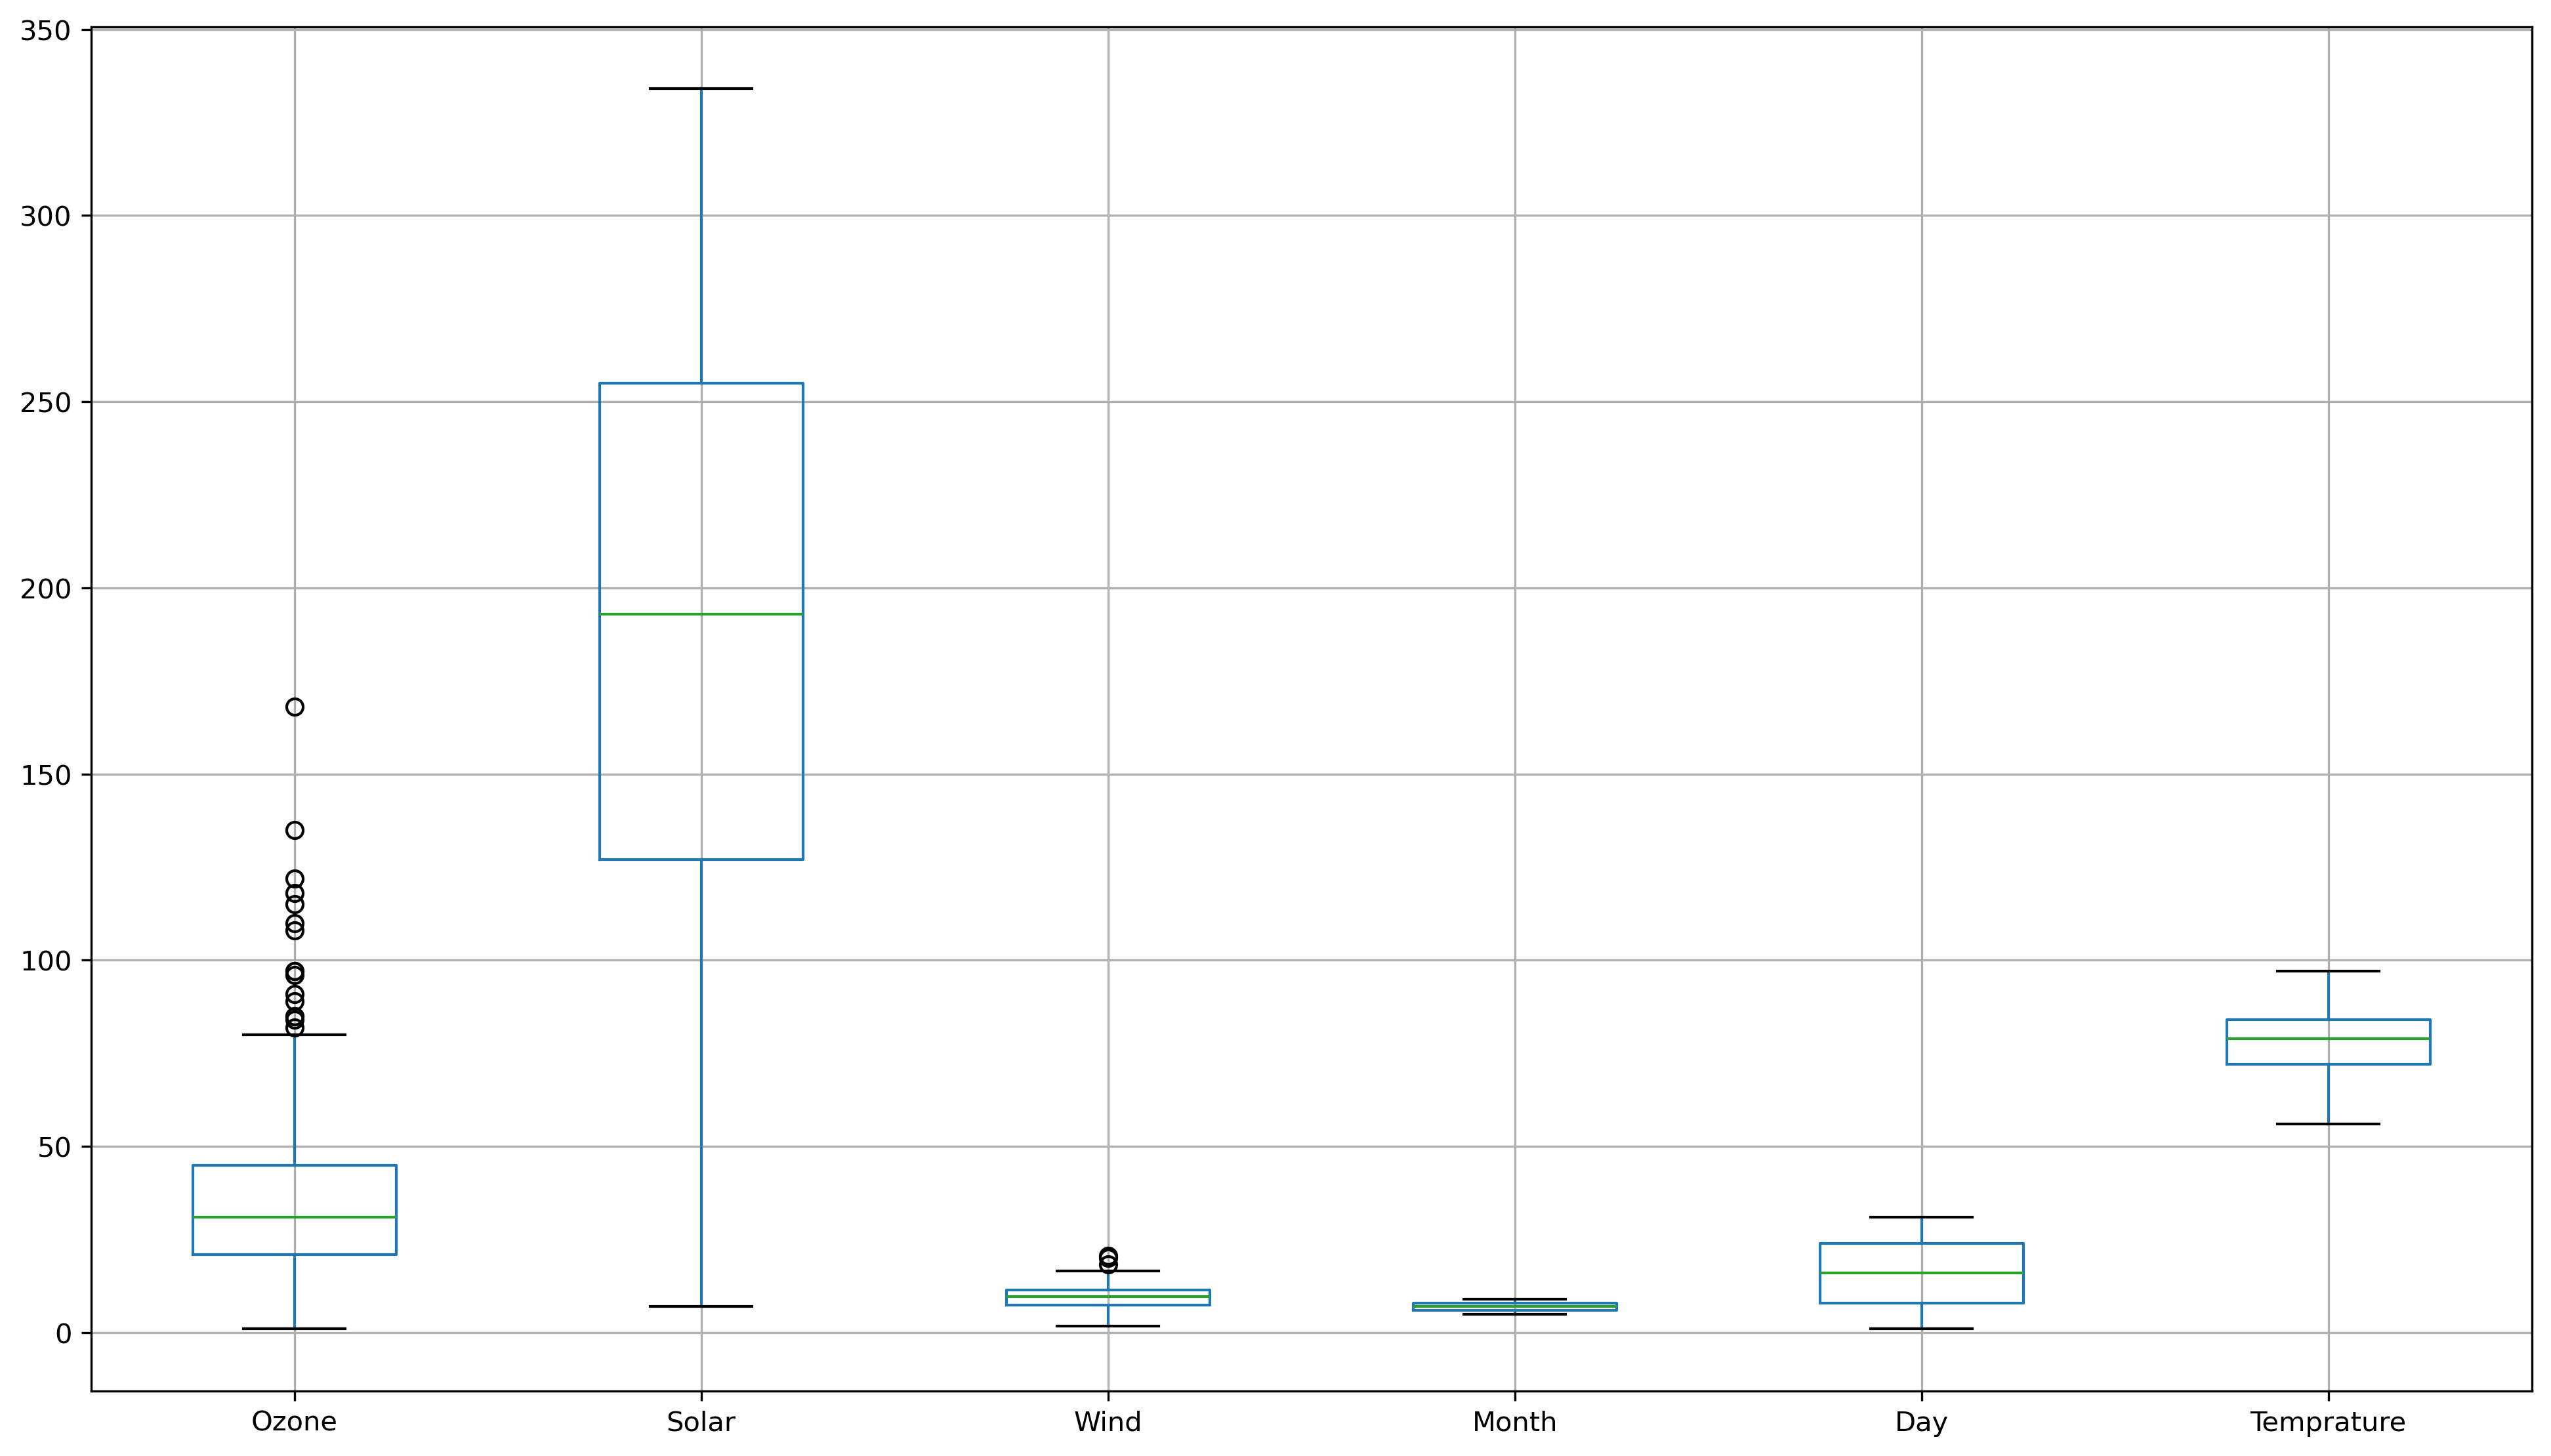

In [237]:
df.boxplot()

* Here in above boxplot, we have outliers detected in 'Ozone' & 'Wind' columns.
* Both columns have outliers at Upper Extreme Value.

<Axes: xlabel='Ozone'>

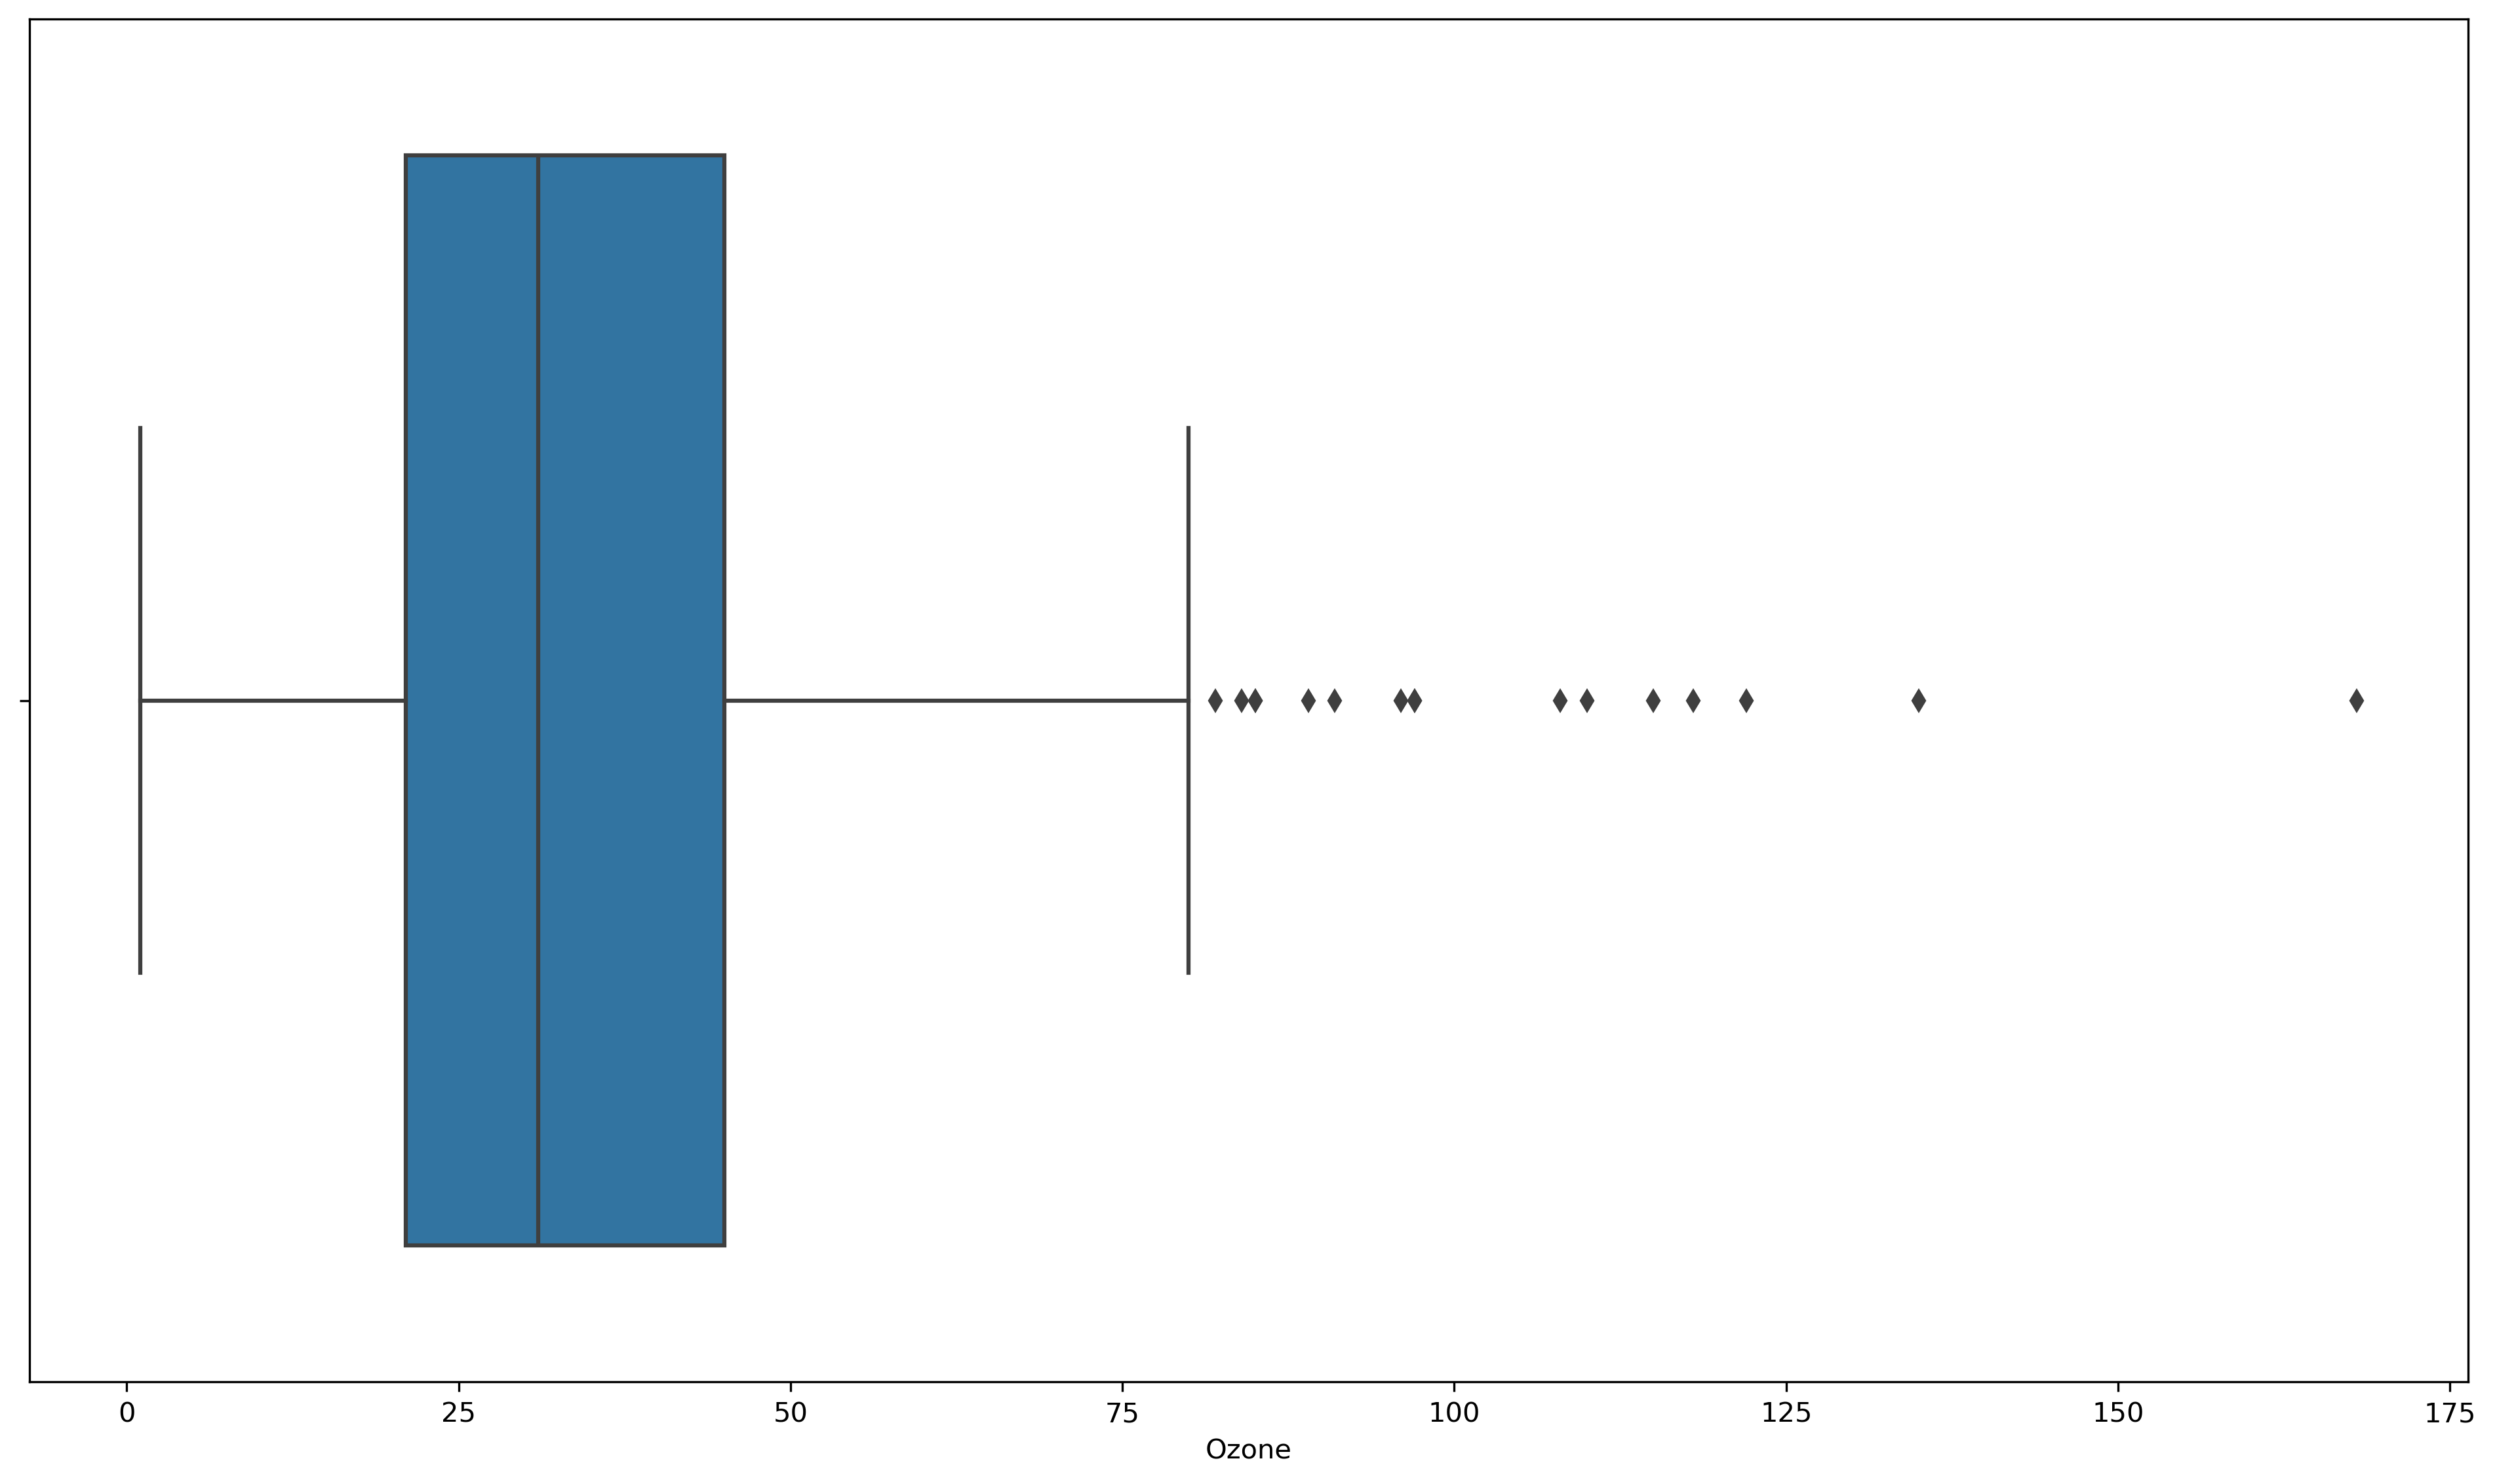

In [238]:
# boxplot of ozone in seaborn library to get detailed view
sns.boxplot(x = df['Ozone'])

<Axes: xlabel='Wind'>

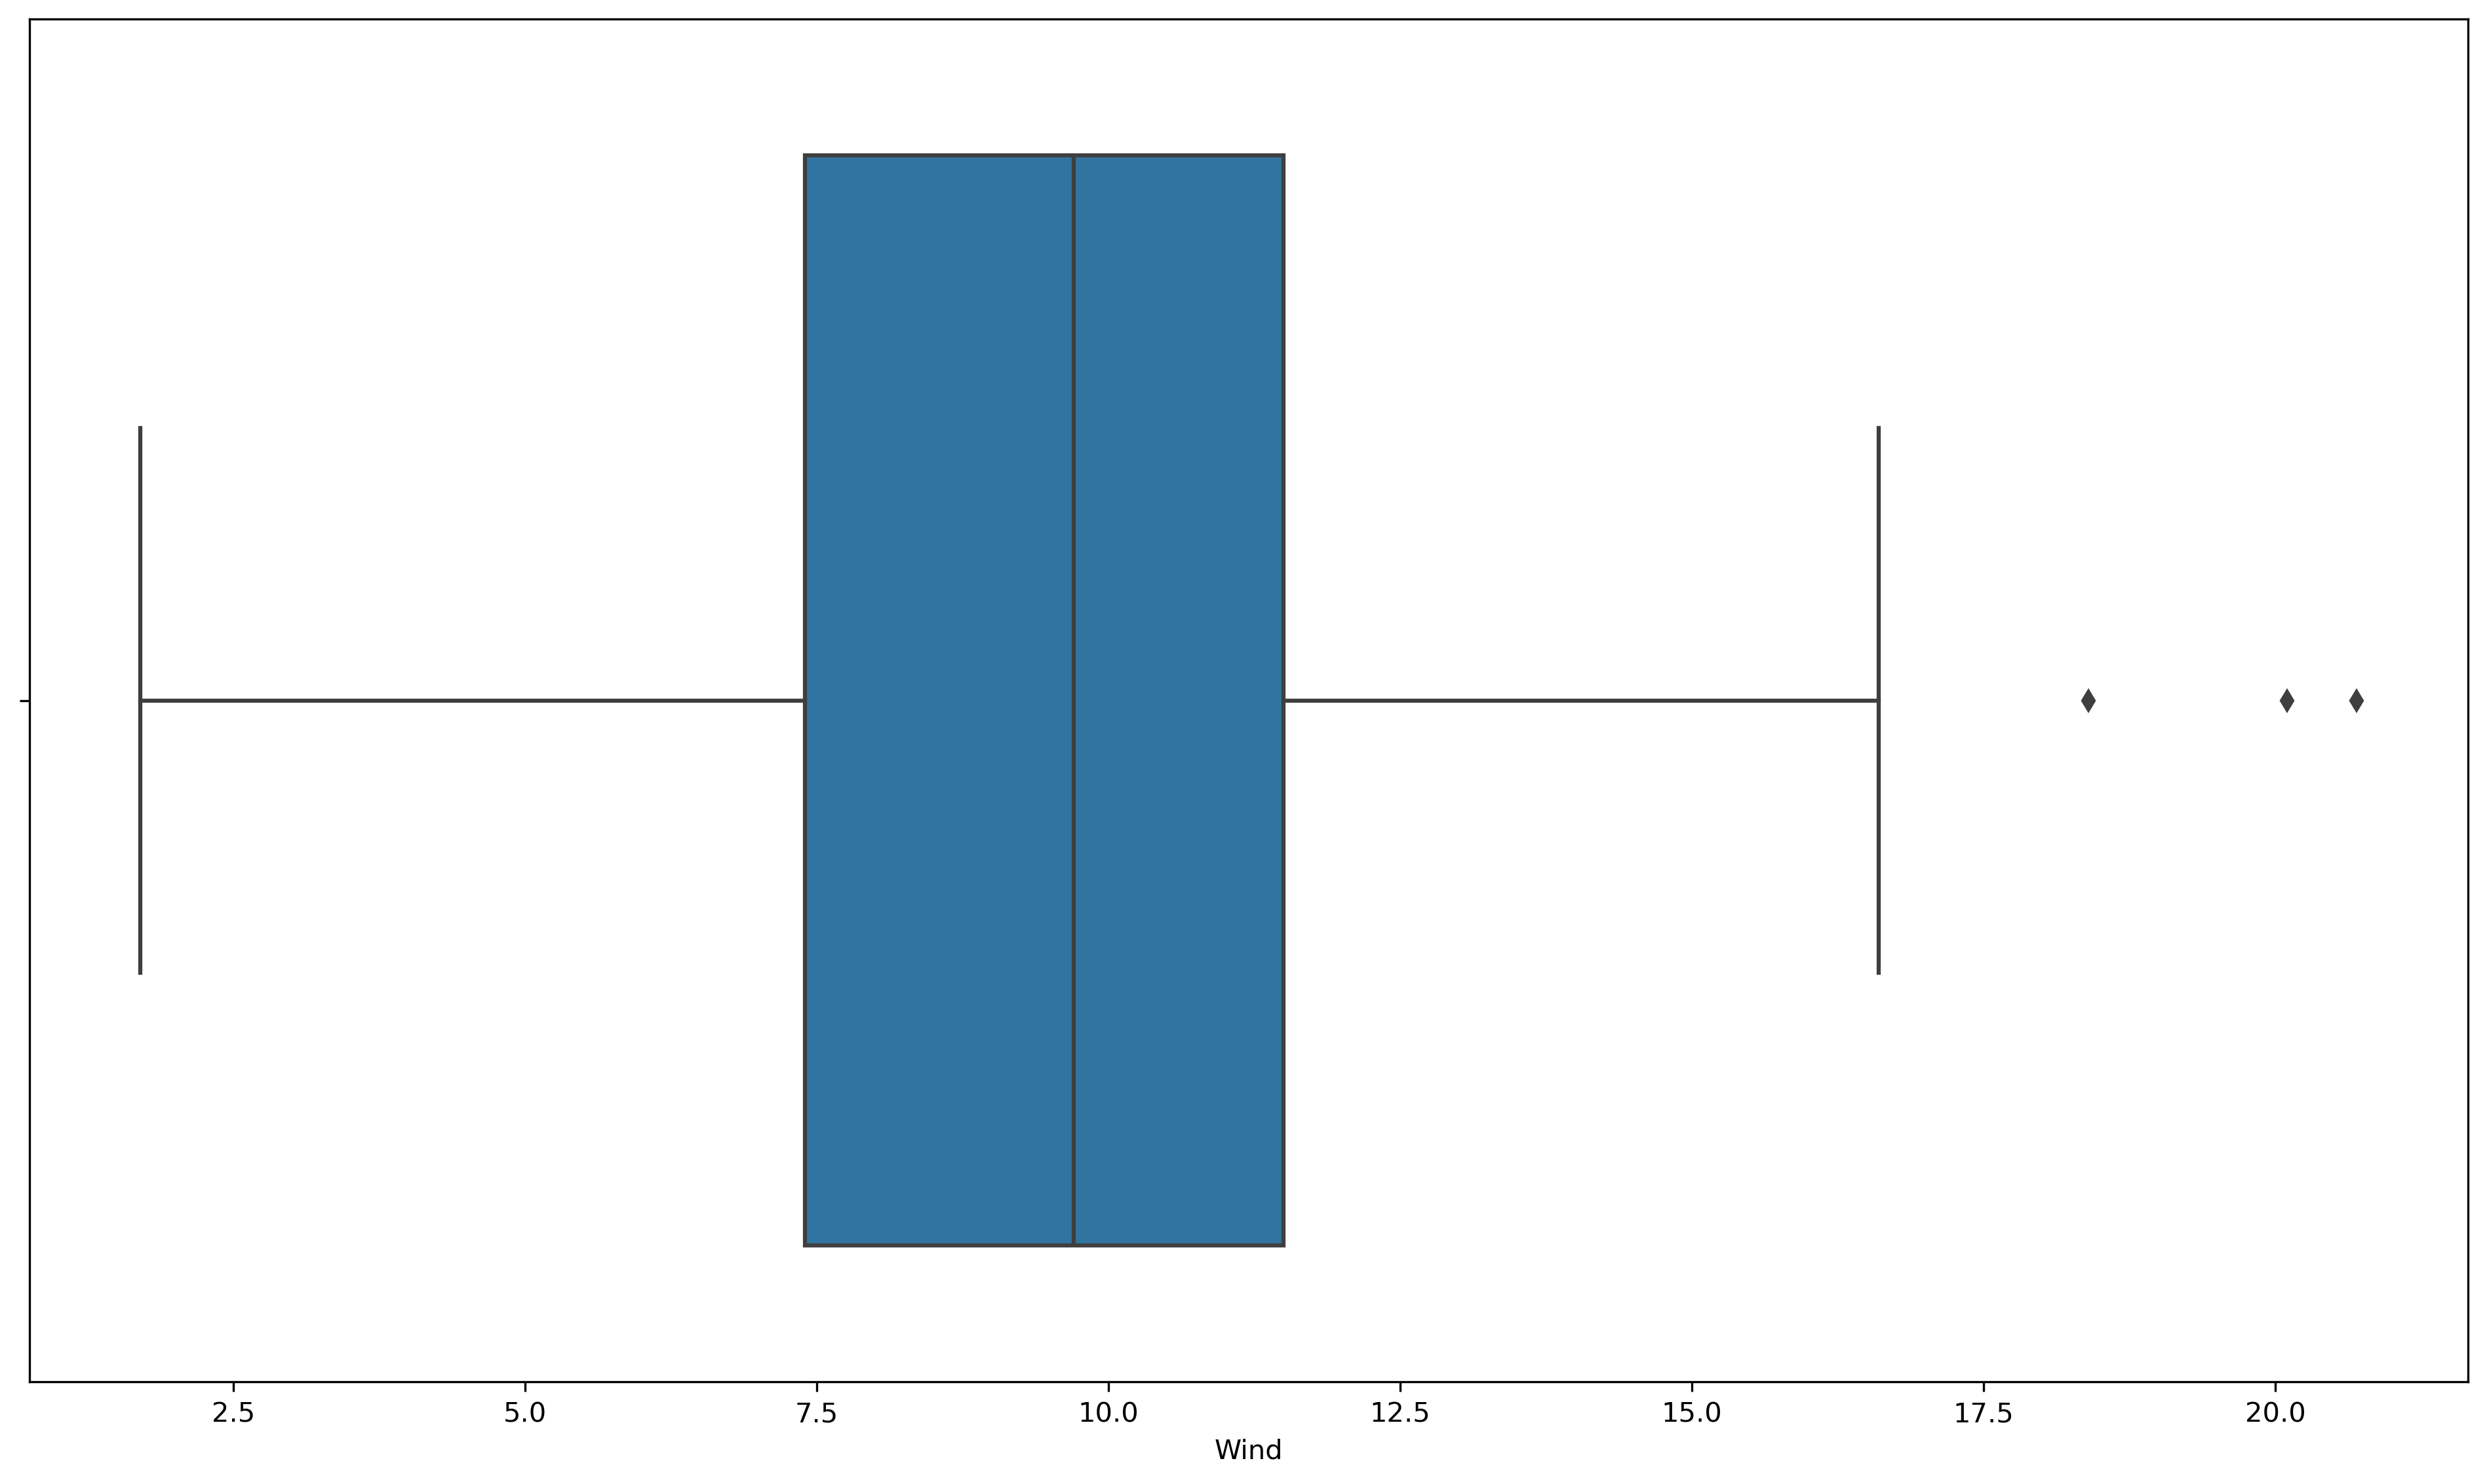

In [239]:
sns.boxplot(x = df['Wind'])

#### Outlier detection function

In [240]:
# To find the 25th percentile value we use 'quantile' function and we need to give the required percentile in range of 0-1
# i.e for 25th percentile --> 0.25
df['Ozone'].quantile(0.25)

21.0

In [241]:
#creating the function for outlier detection, 'iqr = Interquartile range' 
# the last line is capping method

def outlier_detection(data,columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1

        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)

        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

In [242]:
# we need to drop column 'Weather' from funtion as it has Text data and will give error for funtion.
# the drop function in following code will drop the weather column temprary for use of funtion and not from data.
outlier_detection(df,df.drop(columns = 'Weather').columns)

<Axes: >

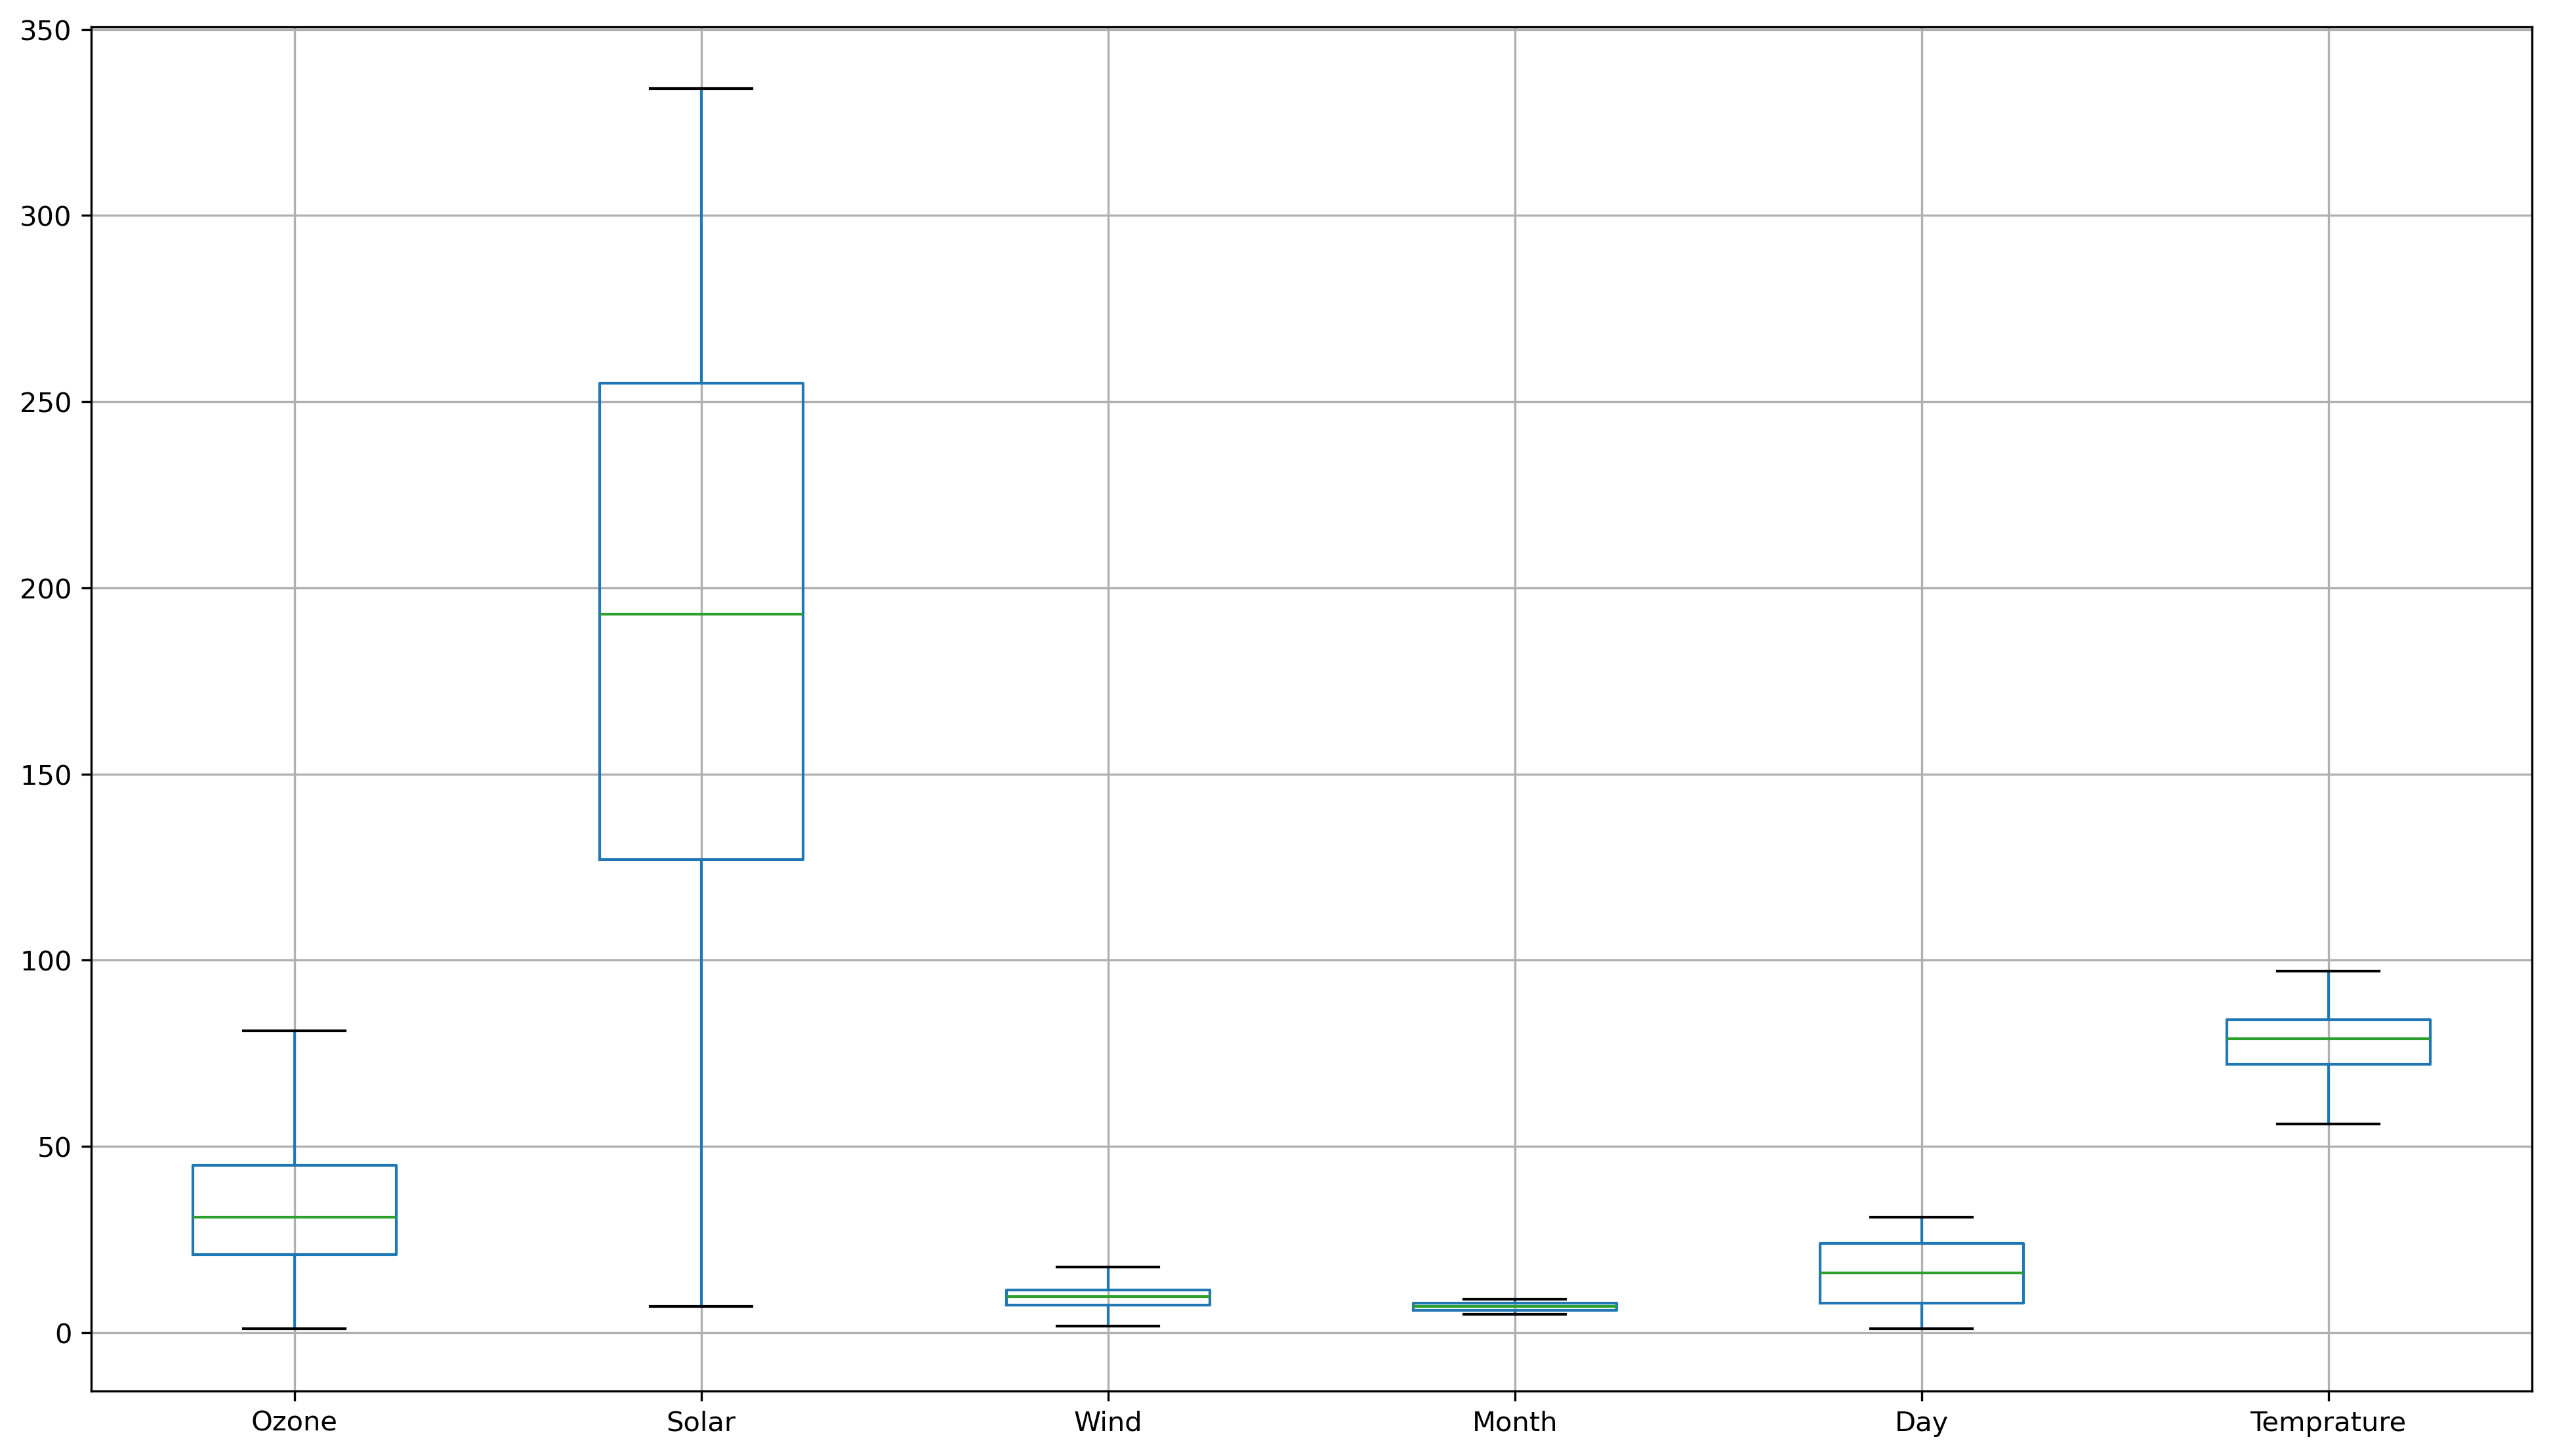

In [243]:
df.boxplot()

In [244]:
df.shape

(157, 7)

- the above boxplot is outlier free, i.e we replaced the outliers with upper extreme value as required because all the outlier values were after upper   extreme value.
- for deleting outliers we dont need to make any changes in main data, rather than deleting the outliers permanantly we will just replaced them with "Capping Method"

* Capping Method to replace outliers, we use the following code:
  - df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

  - In above code we used Numpy(np) library to use the **'where'** conditon to replace(temprary) outliers value with upper extreme value(as required in this condition) and then even used the **'where'** condition for replacing the lower extreme value if there would be any outlier below lower extreme value.

---

# Scatter plot and Correlation
   - Scatter plot can be only used for numerica columns, as we need to show the **Relations** and **Correlation** between columns, text and string columns cant be used for ploting scatter plot.

In [245]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temprature,Weather
1,41.0,190.000000,7.4,5.0,1.0,67.0,S
2,36.0,118.000000,8.0,5.0,2.0,72.0,C
3,12.0,149.000000,12.6,5.0,3.0,74.0,PS
4,18.0,313.000000,11.5,5.0,4.0,62.0,S
5,31.0,185.366667,14.3,5.0,5.0,56.0,S


<Axes: xlabel='Ozone', ylabel='Solar'>

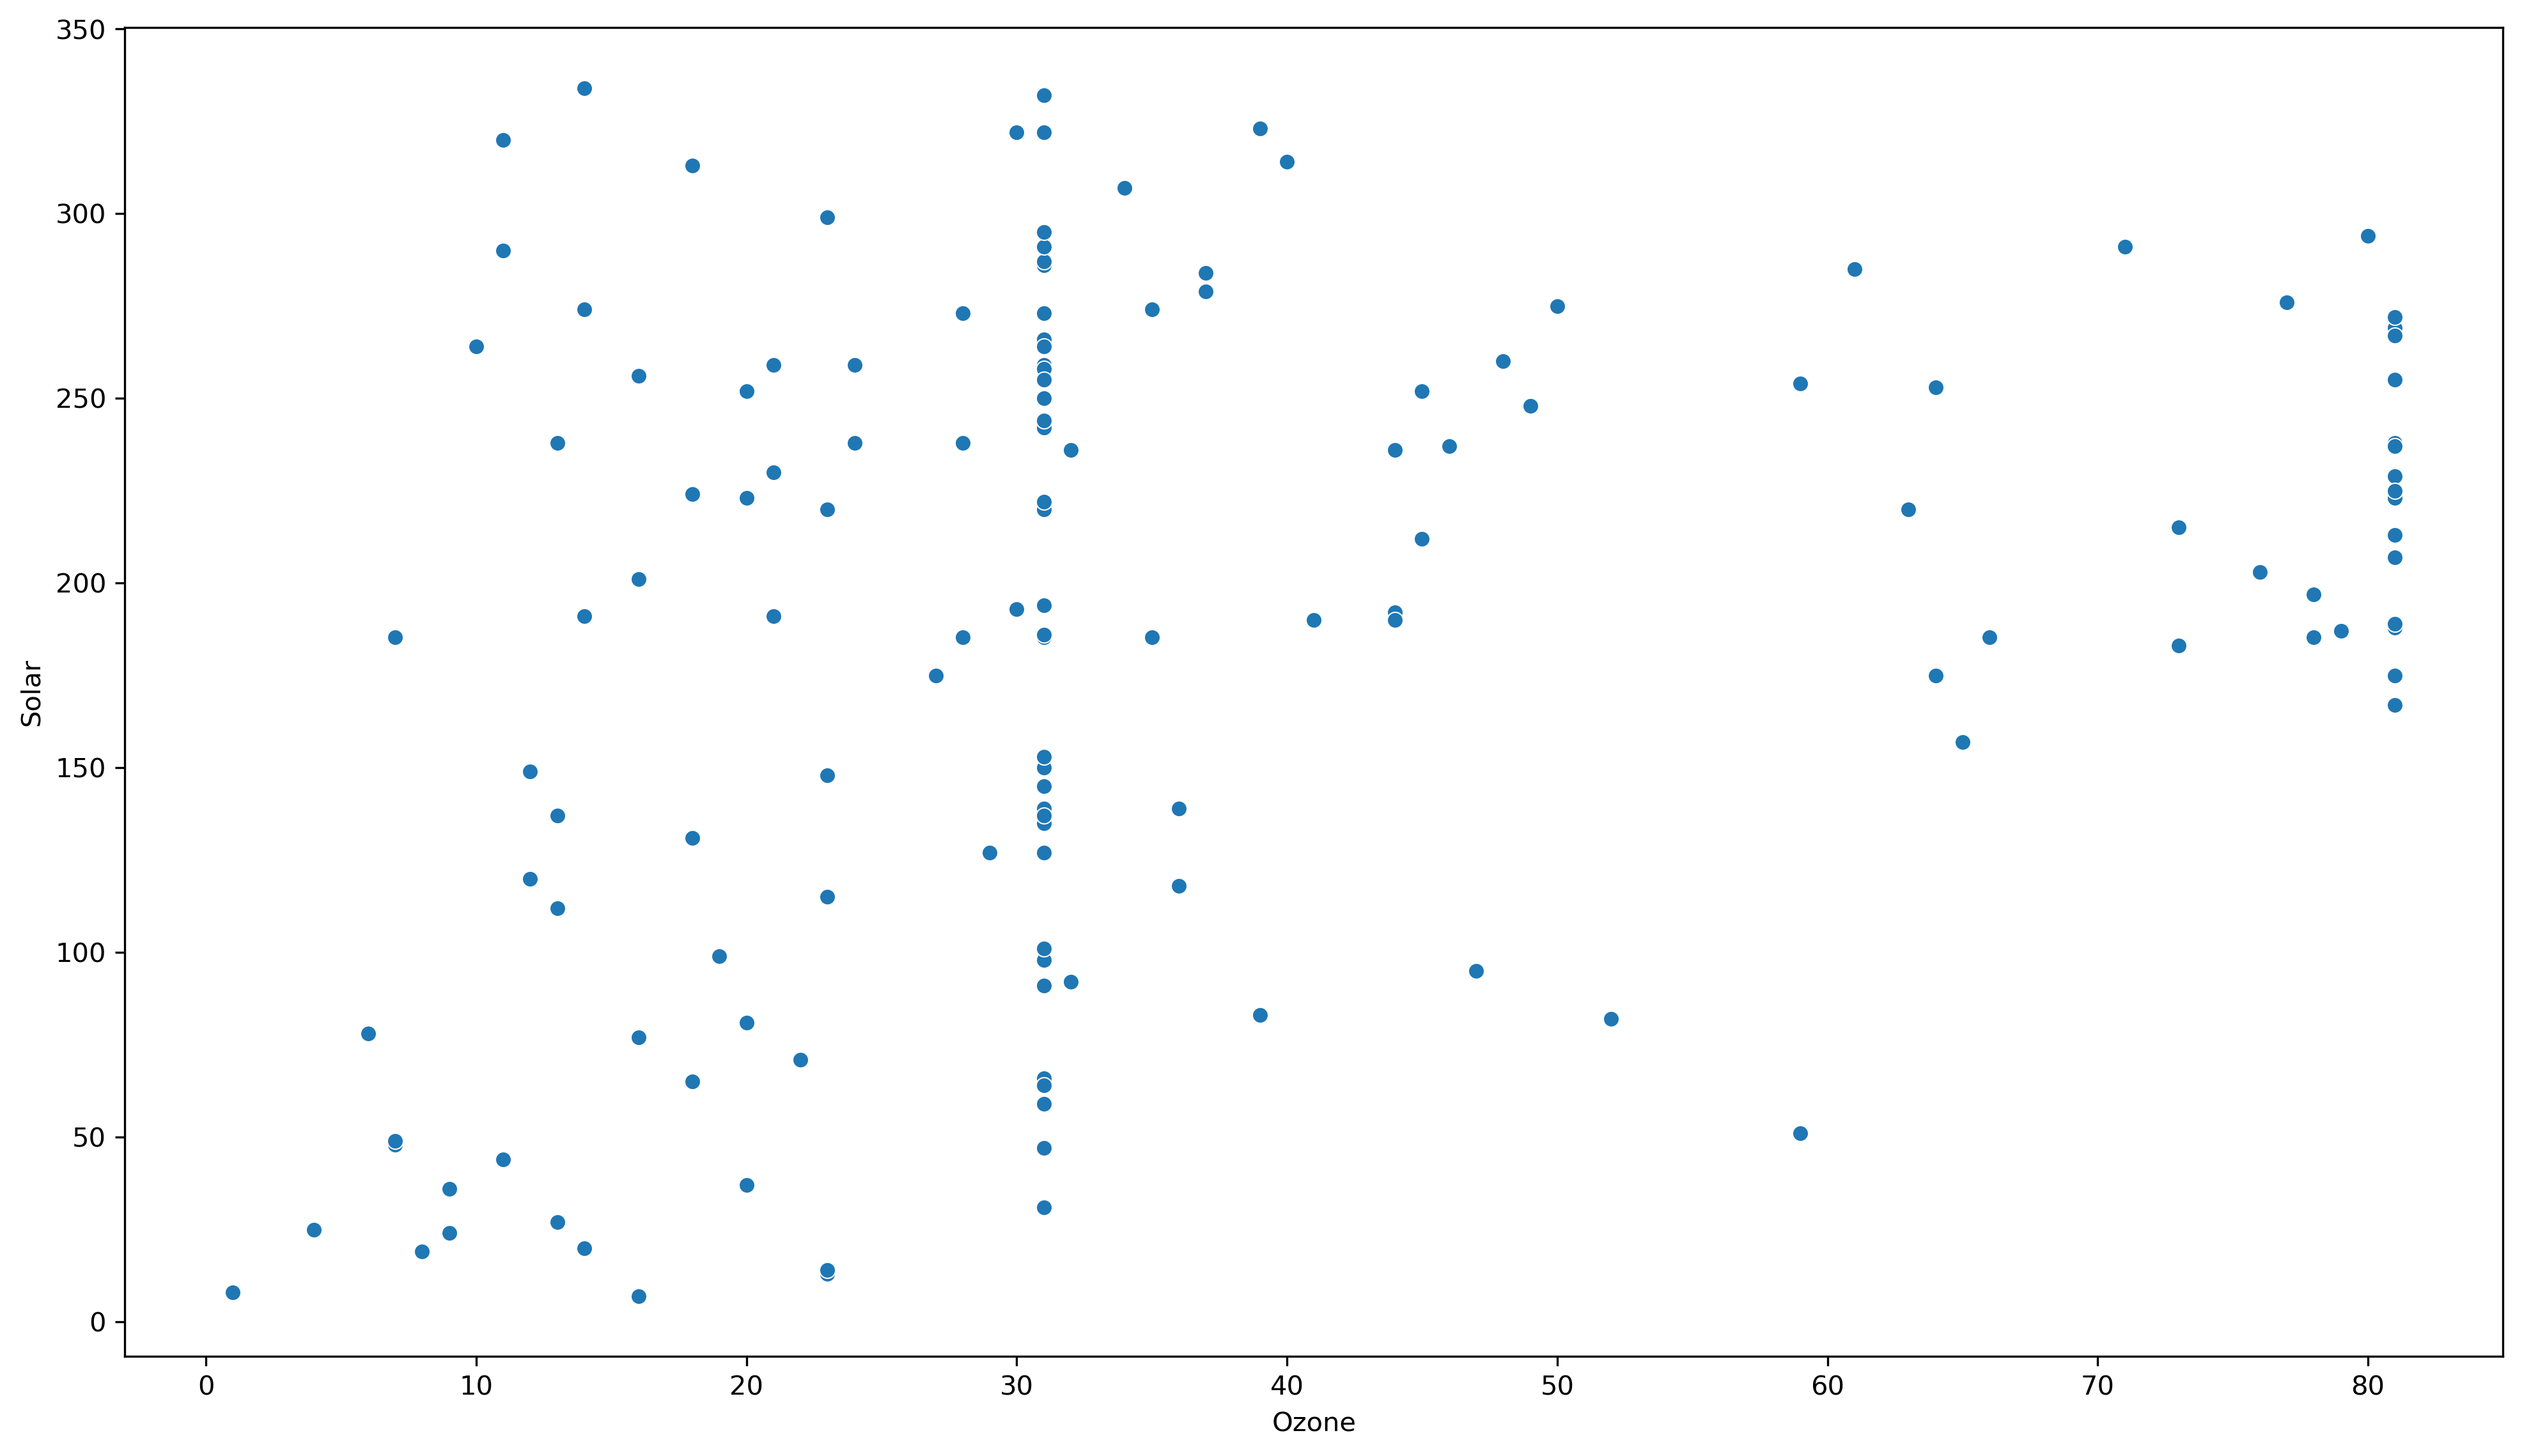

In [246]:
# Relation between Ozone and Solar column using Scatter plot using seaborn library
sns.scatterplot(x = df['Ozone'], y = df['Solar'])

- their is no major/strong relation between **Ozone** and **Solar** column.
- Rather we can say that their is a slight increasing pattern in the scatter plot, but their is no strong relation between both columns.
- Scatter plot doesn't give us the exact number of relation between both columns.

<Axes: xlabel='Ozone', ylabel='Temprature'>

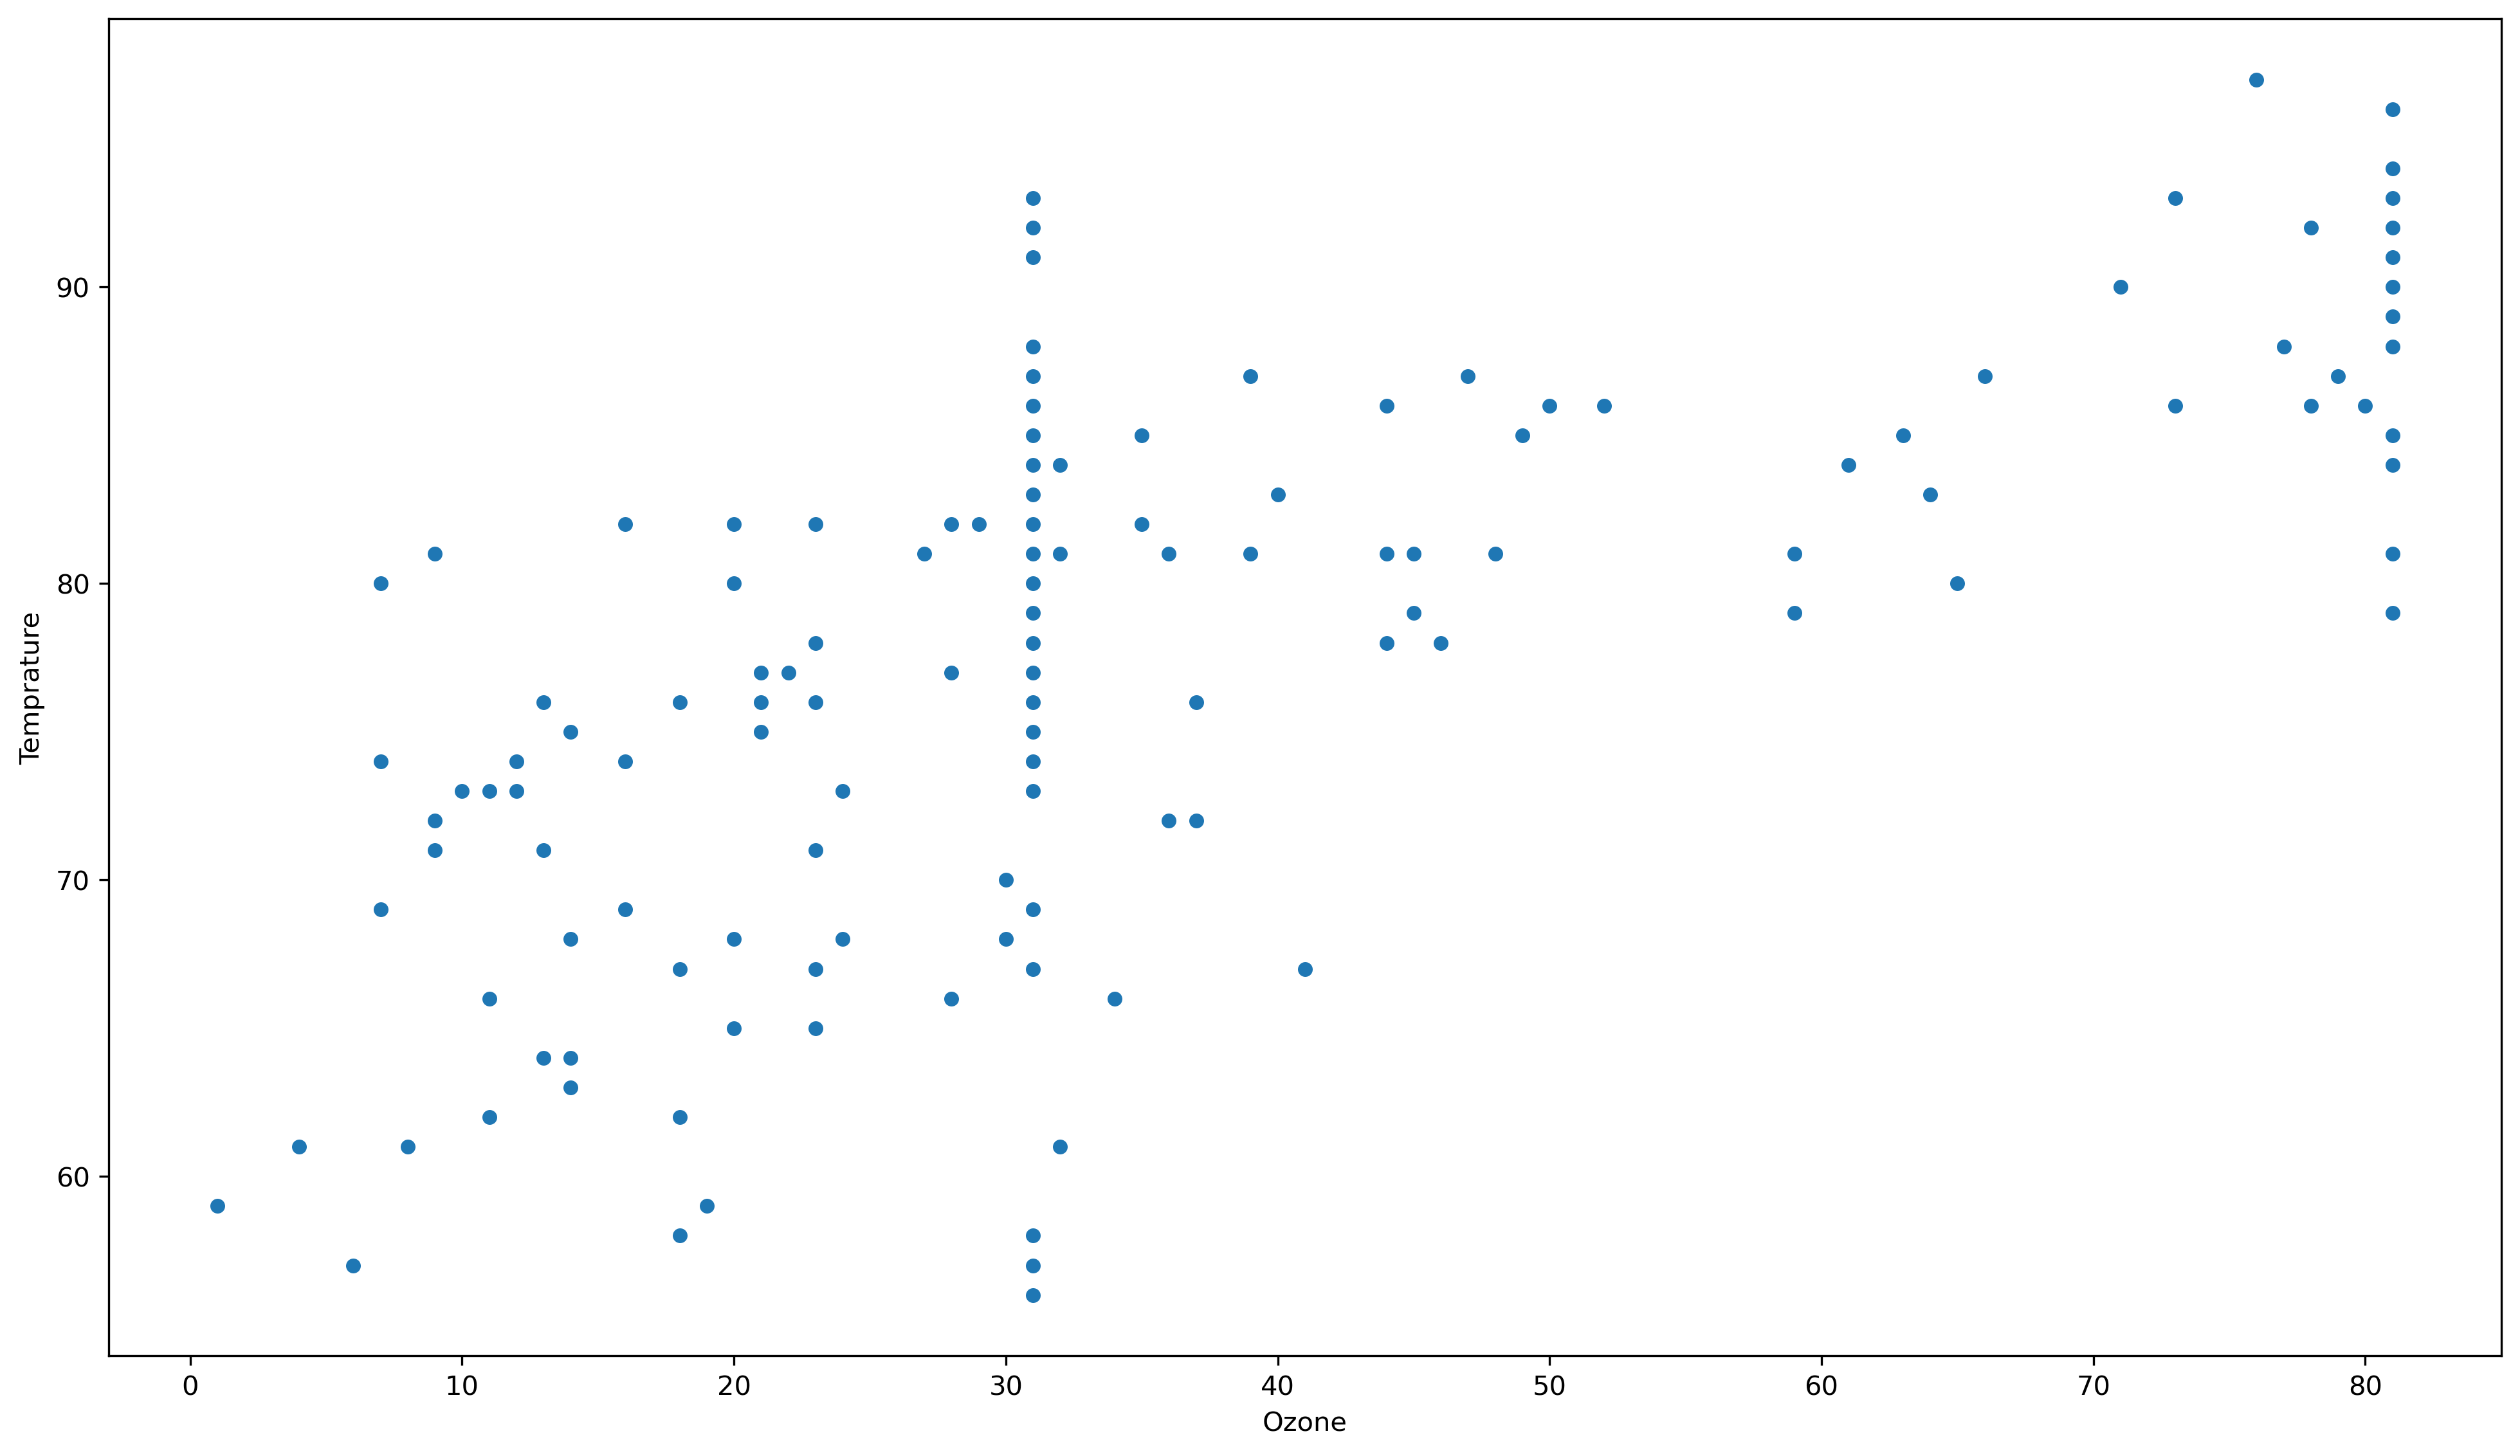

In [247]:
#relation between Ozone and Temprature
sns.scatterplot(x = df['Ozone'], y = df['Temprature'])

- Overall their is a slight positive/increasing relationship between **Ozone** and **Temprature** columns.
- As we can not use categorical(text) data columns to plot in Scatter plot, yet their is way to plot them. Now, for exmaple in above scatter plot we use the **Ozone** and **Temprature** column to show the relation, here we can use categorical column **Weather** to show the colour coding, todo this we will assign the colours to the categorical column and use them in scatter plot.

<Axes: xlabel='Ozone', ylabel='Temprature'>

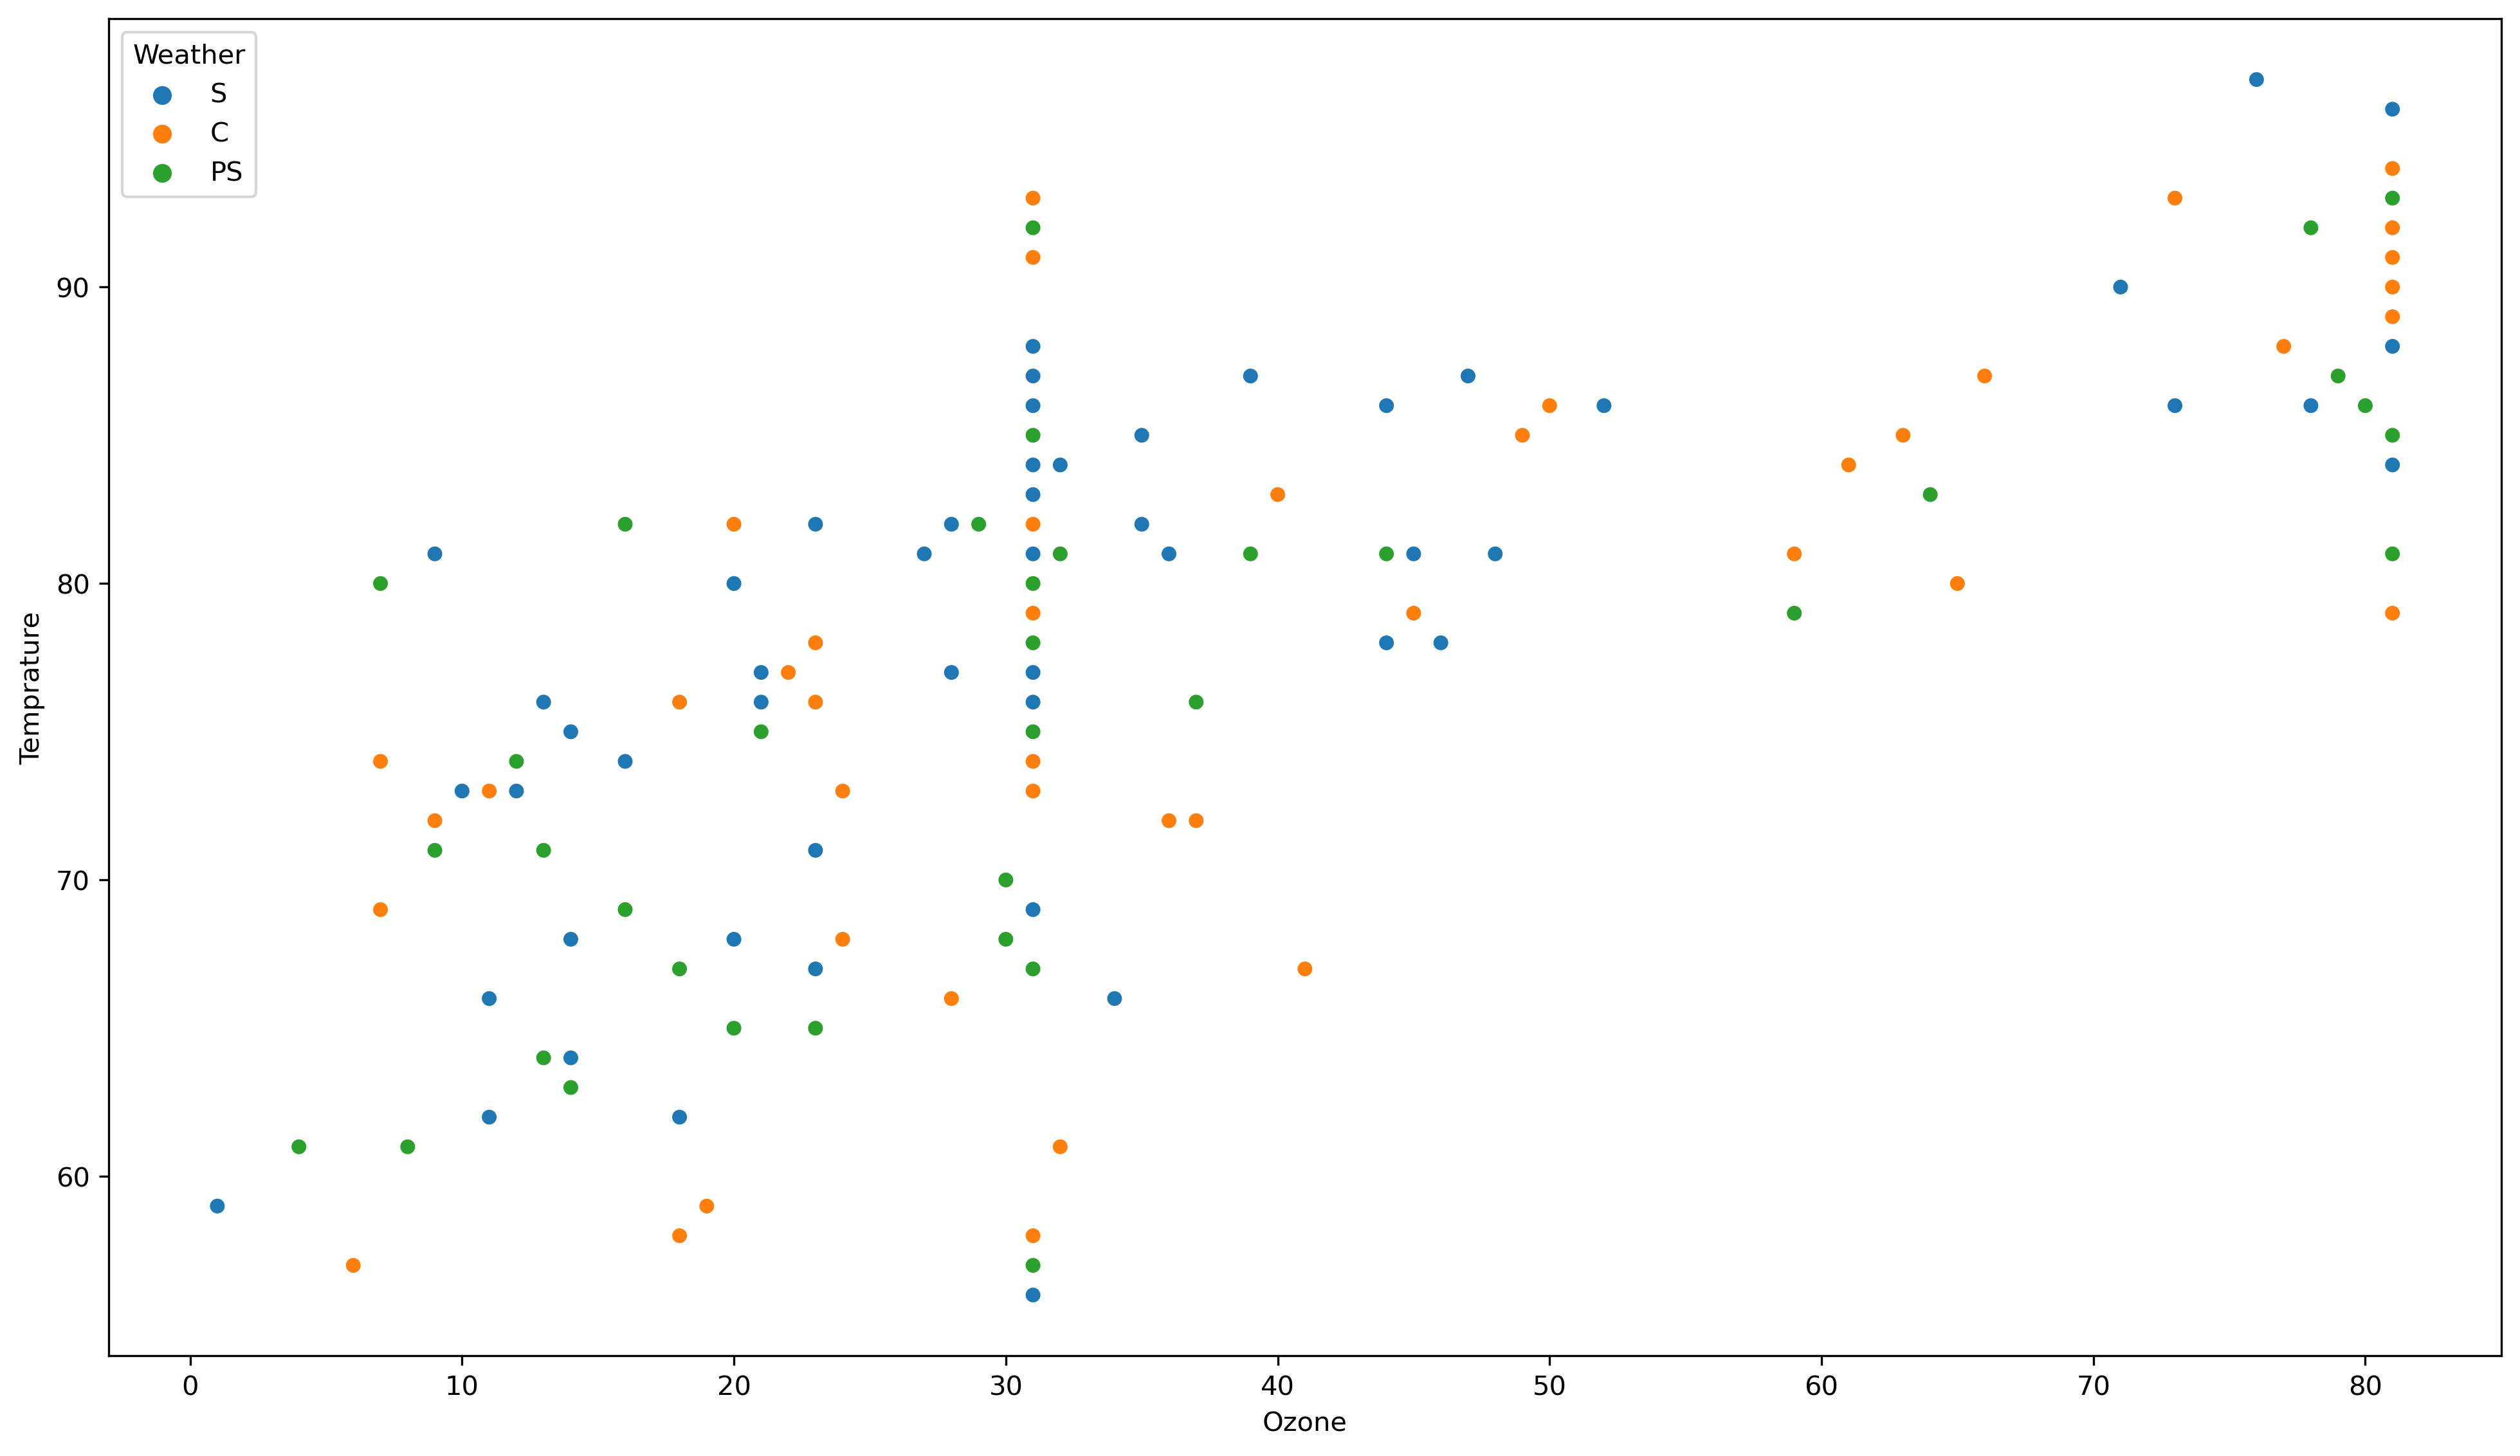

In [248]:
# Using the colour coding for categorical column(Weather)
sns.scatterplot(x = df['Ozone'], y = df['Temprature'], hue = df['Weather'])

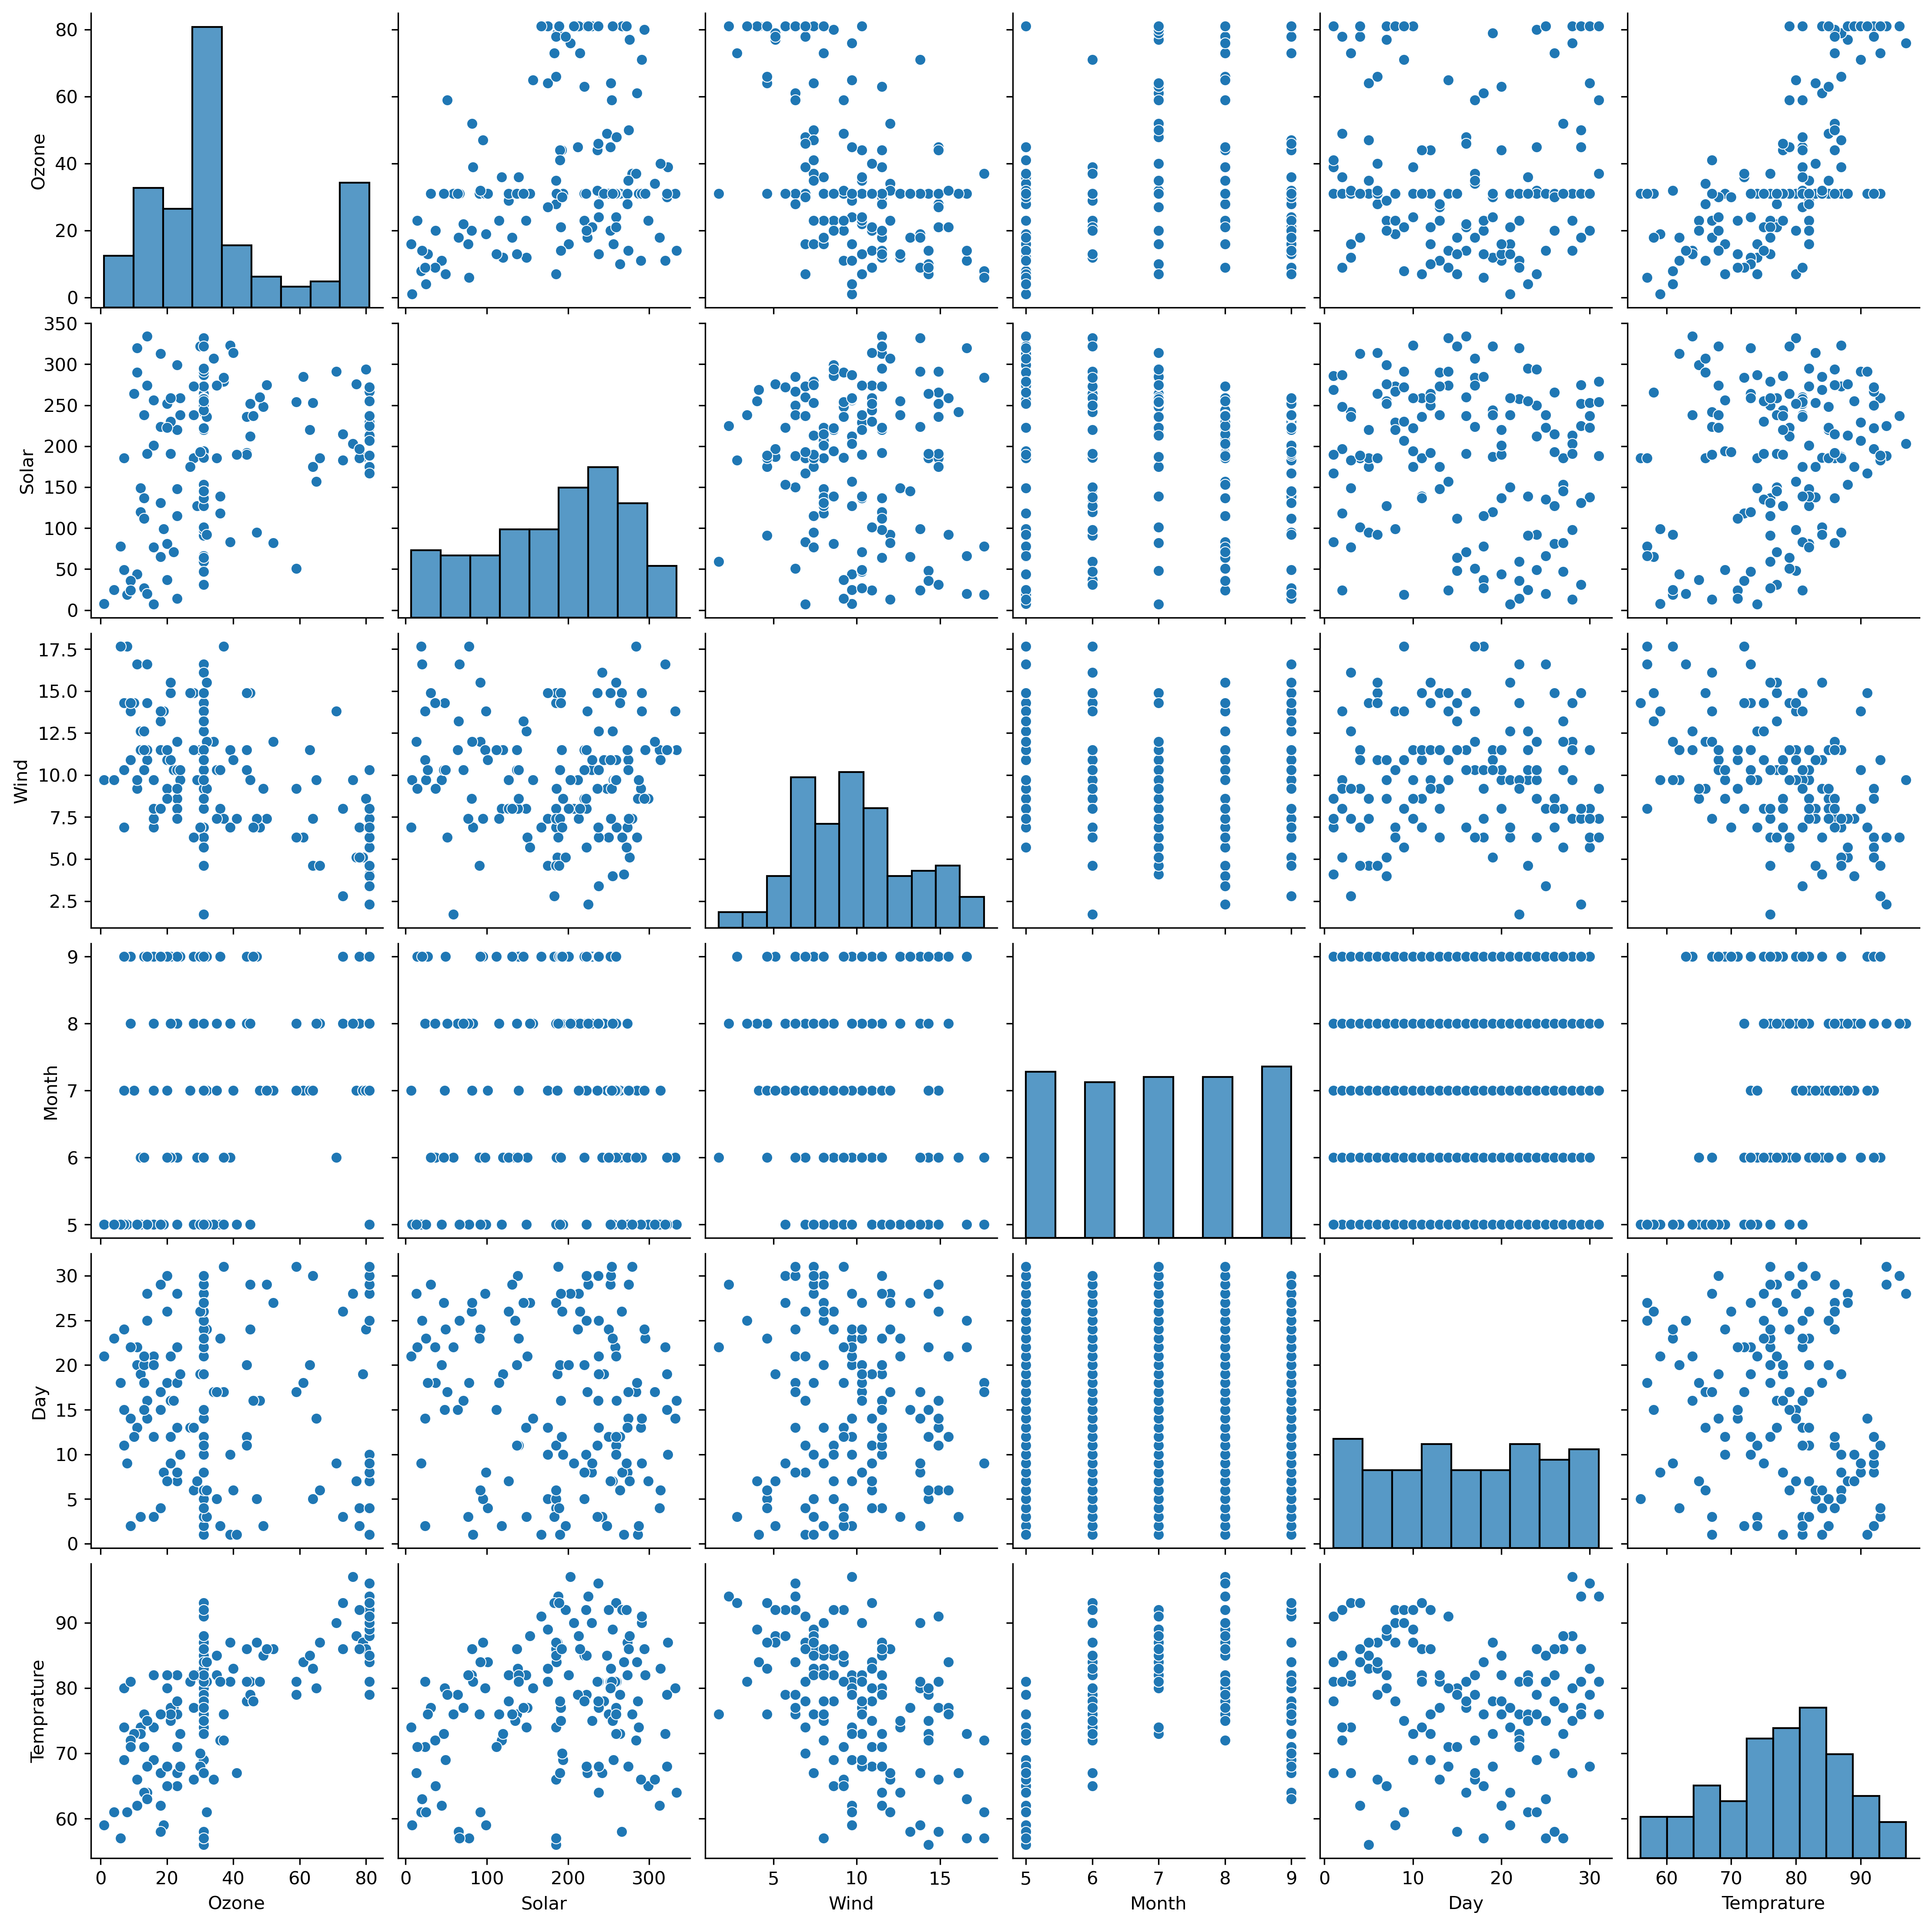

In [249]:
#To plot all the scatter plots together we have the function of pairplot
sns.pairplot(df)

In [250]:
df.corr(numeric_only = True)

,Ozone,Solar,Wind,Month,Day,Temprature
Ozone,1.000000,0.317926,-0.522513,0.183089,-0.042835,0.662773
Solar,0.317926,1.000000,-0.053534,-0.080237,-0.151007,0.260677
Wind,-0.522513,-0.053534,1.000000,-0.162988,0.033374,-0.439939
Month,0.183089,-0.080237,-0.162988,1.000000,0.041438,0.408060
Day,-0.042835,-0.151007,0.033374,0.041438,1.000000,-0.122787
Temprature,0.662773,0.260677,-0.439939,0.408060,-0.122787,1.000000


<Axes: >

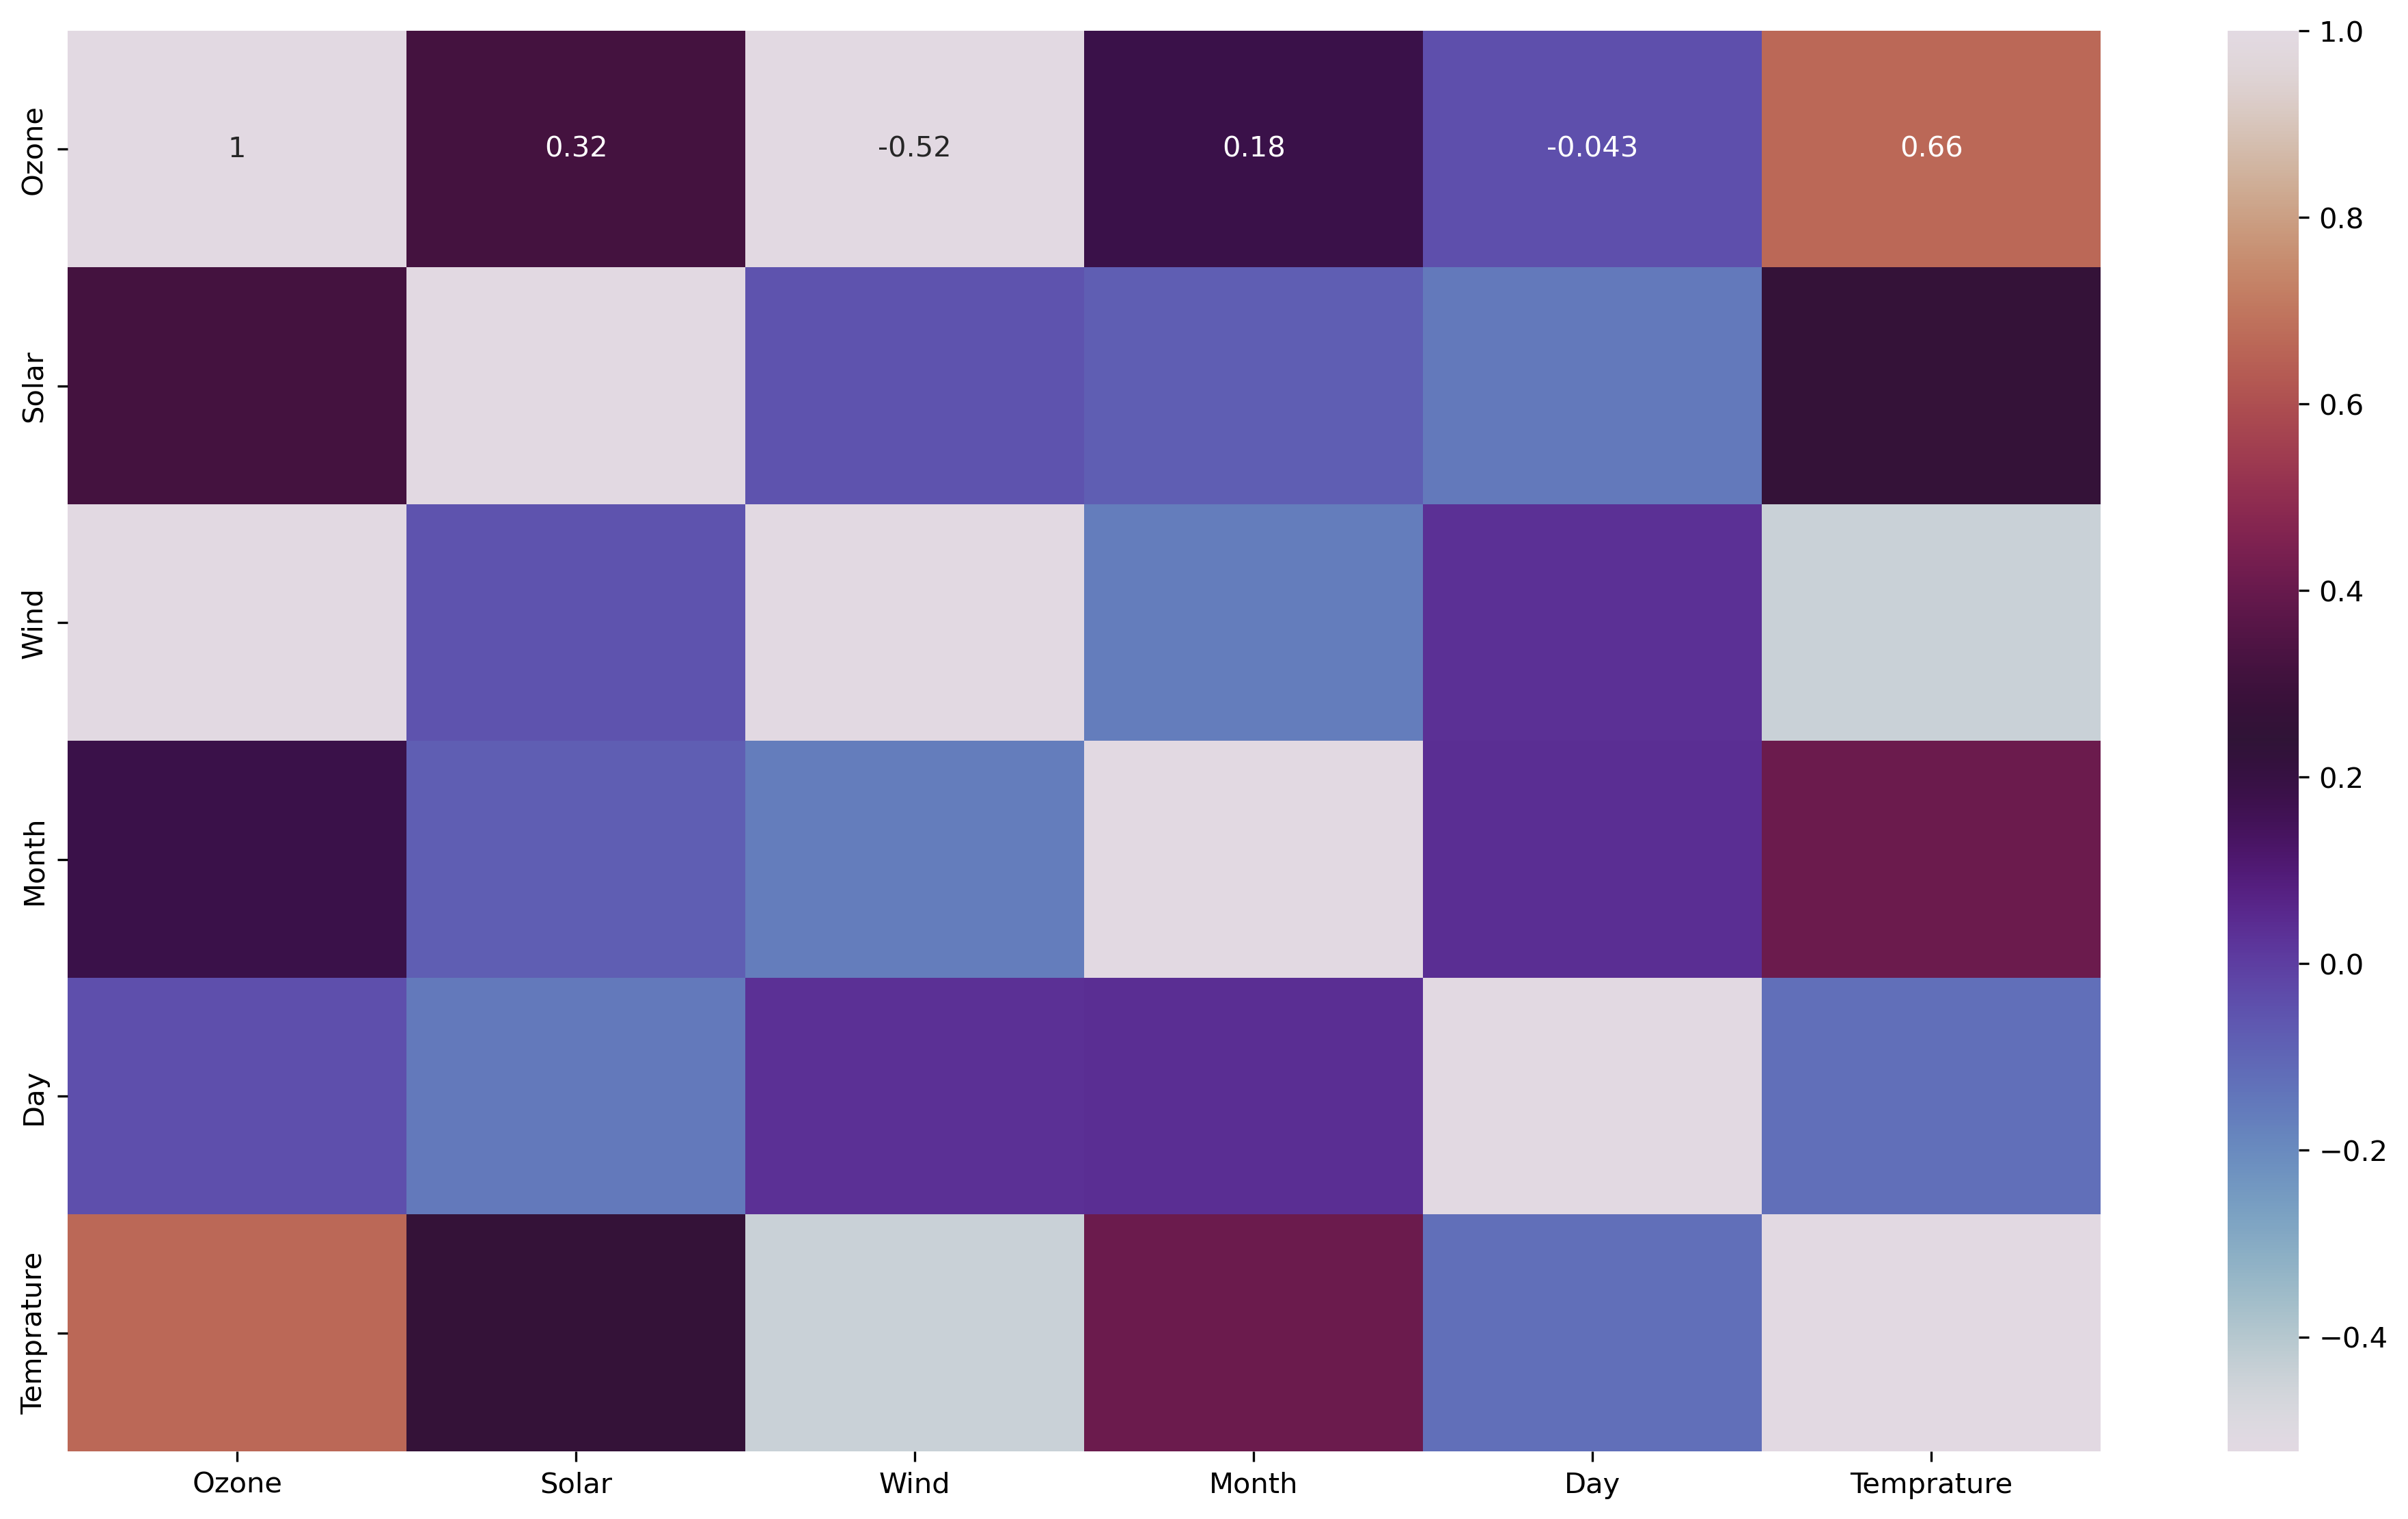

In [251]:
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap = 'twilight')

#### Relationship strength
      - >0.8 Strong Relationship
      - 0.3-0.7 Moderate Relationship
      - <0.3 low/weak Relationship

---

# Transformation

* Machines do not understand words and sentences.
* Machines only understand numbers.
* Before model building, we have convert all the columns into numerical


- Before model building we need to perform two major steps:
    * Encoding --> Converting any categorical columns into numerical column
        OHE - One Hot Encoding
    * Scaling -->
      

- get_dummies is the library for OHE - One Hot Encoding
- in this library we need to mentions 2 things
  * 1st is where you will store the data, so they have given a parameter known as "Data" and it is compulsory to use. so for us it would be like **(data = df)**.
  * 2nd thing is on which column we have to apply **One Hot Encoding**, for us its gonna be "Weather" column, amd even we can add multiple column.
  * after the encoding the weather column will be deleted permanently and will replace with the encoded columns.
 



In [252]:
df

,Ozone,Solar,Wind,Month,Day,Temprature,Weather
1,41.0,190.000000,7.4,5.0,1.0,67.0,S
2,36.0,118.000000,8.0,5.0,2.0,72.0,C
3,12.0,149.000000,12.6,5.0,3.0,74.0,PS
4,18.0,313.000000,11.5,5.0,4.0,62.0,S
5,31.0,185.366667,14.3,5.0,5.0,56.0,S
...,...,...,...,...,...,...,...
153,20.0,223.000000,11.5,9.0,30.0,68.0,S
154,41.0,190.000000,7.4,5.0,1.0,67.0,C
155,30.0,193.000000,6.9,9.0,26.0,70.0,PS
156,31.0,145.000000,13.2,9.0,27.0,77.0,S


In [253]:
#Encoding the categorical value to numerical..
df = pd.get_dummies(data = df, columns = ['Weather'])

In [254]:
# by default python converted values in to 'bool' to conver them back to 'int' we did it manually.
bool_columns = df.select_dtypes(include=['bool']).columns

In [255]:
bool_columns

Index(['Weather_C', 'Weather_PS', 'Weather_S'], dtype='object')

In [256]:
df[bool_columns] = df[bool_columns].astype('int')

In [257]:
df

,Ozone,Solar,Wind,Month,Day,Temprature,Weather_C,Weather_PS,Weather_S
1,41.0,190.000000,7.4,5.0,1.0,67.0,0,0,1
2,36.0,118.000000,8.0,5.0,2.0,72.0,1,0,0
3,12.0,149.000000,12.6,5.0,3.0,74.0,0,1,0
4,18.0,313.000000,11.5,5.0,4.0,62.0,0,0,1
5,31.0,185.366667,14.3,5.0,5.0,56.0,0,0,1
...,...,...,...,...,...,...,...,...,...
153,20.0,223.000000,11.5,9.0,30.0,68.0,0,0,1
154,41.0,190.000000,7.4,5.0,1.0,67.0,1,0,0
155,30.0,193.000000,6.9,9.0,26.0,70.0,0,1,0
156,31.0,145.000000,13.2,9.0,27.0,77.0,0,0,1


---

# Scaling the data
  * Normalization (Min-Max Scaling)
    - Scales value within the range of 0 to 1
  * Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

In [261]:
# StandardScaler and MinMaxScaler are called as classes
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [262]:
# standardization
sc = StandardScaler()

In [263]:
df.head(2)

,Ozone,Solar,Wind,Month,Day,Temprature,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,5.0,1.0,67.0,0,0,1
2,36.0,118.0,8.0,5.0,2.0,72.0,1,0,0


In [265]:
# Why we useing fit_tranform ?? --> fit = will do all calculation(mean, standard deviation, Z-score, etc)
# tranform = will replace all old values with new values. 
x = sc.fit_transform(df)
x

array([[ 0.19019358,  0.05342774, -0.73459309, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.03297826, -0.7768163 , -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027],
       [-1.10420306, -0.41935011,  0.79941842, ..., -0.67357531,
         1.52984494, -0.79713027],
       ...,
       [-0.30078446,  0.08802124, -0.8820942 , ..., -0.67357531,
         1.52984494, -0.79713027],
       [-0.25615009, -0.46547478,  0.97641975, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.83639686, -0.62691113, -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027]])

In [267]:
 df.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temprature', 'Weather_C',
       'Weather_PS', 'Weather_S'],
      dtype='object')

In [269]:
# it arranged the array data in to table form
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8
0,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,-0.673575,-0.653661,1.25450
1,-0.032978,-0.776816,-0.557592,-1.412198,-1.557152,-0.612802,1.484615,-0.653661,-0.79713
2,-1.104203,-0.419350,0.799418,-1.412198,-1.445367,-0.399476,-0.673575,1.529845,-0.79713
3,-0.836397,1.471761,0.474916,-1.412198,-1.333583,-1.679431,-0.673575,-0.653661,1.25450
4,-0.256150,0.000000,1.300922,-1.412198,-1.221798,-2.319408,-0.673575,-0.653661,1.25450
...,...,...,...,...,...,...,...,...,...
152,-0.747128,0.433956,0.474916,1.385469,1.572816,-1.039454,-0.673575,-0.653661,1.25450
153,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,1.484615,-0.653661,-0.79713
154,-0.300784,0.088021,-0.882094,1.385469,1.125678,-0.826128,-0.673575,1.529845,-0.79713
155,-0.256150,-0.465475,0.976420,1.385469,1.237462,-0.079488,-0.673575,-0.653661,1.25450


In [270]:
# to give the columns names to the respective columns we will use columns function
scaled_data = pd.DataFrame(x, columns = df.columns)

In [272]:
scaled_data

,Ozone,Solar,Wind,Month,Day,Temprature,Weather_C,Weather_PS,Weather_S
0,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,-0.673575,-0.653661,1.25450
1,-0.032978,-0.776816,-0.557592,-1.412198,-1.557152,-0.612802,1.484615,-0.653661,-0.79713
2,-1.104203,-0.419350,0.799418,-1.412198,-1.445367,-0.399476,-0.673575,1.529845,-0.79713
3,-0.836397,1.471761,0.474916,-1.412198,-1.333583,-1.679431,-0.673575,-0.653661,1.25450
4,-0.256150,0.000000,1.300922,-1.412198,-1.221798,-2.319408,-0.673575,-0.653661,1.25450
...,...,...,...,...,...,...,...,...,...
152,-0.747128,0.433956,0.474916,1.385469,1.572816,-1.039454,-0.673575,-0.653661,1.25450
153,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,1.484615,-0.653661,-0.79713
154,-0.300784,0.088021,-0.882094,1.385469,1.125678,-0.826128,-0.673575,1.529845,-0.79713
155,-0.256150,-0.465475,0.976420,1.385469,1.237462,-0.079488,-0.673575,-0.653661,1.25450


- most of Machine Learning algorithms assume that the data is following Normal Distribution. So for that we use standardization.

In [278]:
mn = MinMaxScaler()

In [279]:
df.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temprature', 'Weather_C',
       'Weather_PS', 'Weather_S'],
      dtype='object')

In [280]:
df

,Ozone,Solar,Wind,Month,Day,Temprature,Weather_C,Weather_PS,Weather_S
1,41.0,190.000000,7.4,5.0,1.0,67.0,0,0,1
2,36.0,118.000000,8.0,5.0,2.0,72.0,1,0,0
3,12.0,149.000000,12.6,5.0,3.0,74.0,0,1,0
4,18.0,313.000000,11.5,5.0,4.0,62.0,0,0,1
5,31.0,185.366667,14.3,5.0,5.0,56.0,0,0,1
...,...,...,...,...,...,...,...,...,...
153,20.0,223.000000,11.5,9.0,30.0,68.0,0,0,1
154,41.0,190.000000,7.4,5.0,1.0,67.0,1,0,0
155,30.0,193.000000,6.9,9.0,26.0,70.0,0,1,0
156,31.0,145.000000,13.2,9.0,27.0,77.0,0,0,1


In [281]:
minmax_scaled = pd.DataFrame(mn.fit_transform(df), columns = df.columns)

minmax_scaled

,Ozone,Solar,Wind,Month,Day,Temprature,Weather_C,Weather_PS,Weather_S
0,0.5000,0.559633,0.357367,0.0,0.000000,0.268293,0.0,0.0,1.0
1,0.4375,0.339450,0.394984,0.0,0.033333,0.390244,1.0,0.0,0.0
2,0.1375,0.434251,0.683386,0.0,0.066667,0.439024,0.0,1.0,0.0
3,0.2125,0.935780,0.614420,0.0,0.100000,0.146341,0.0,0.0,1.0
4,0.3750,0.545464,0.789969,0.0,0.133333,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
152,0.2375,0.660550,0.614420,1.0,0.966667,0.292683,0.0,0.0,1.0
153,0.5000,0.559633,0.357367,0.0,0.000000,0.268293,1.0,0.0,0.0
154,0.3625,0.568807,0.326019,1.0,0.833333,0.341463,0.0,1.0,0.0
155,0.3750,0.422018,0.721003,1.0,0.866667,0.512195,0.0,0.0,1.0
